In [1]:
import numpy as np
import mne
from matplotlib.collections import LineCollection

In [2]:
from scipy import signal

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ritwik\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
data=np.load('bci_3.npz')
data['events']

array([[-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],

In [6]:
data['X'].shape

(278, 64, 3000)

In [7]:
data_2=data["X"]
#data_2[0, 0, :]

In [8]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
  
# Create/view notch filter
samp_freq = 1000  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 20.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))


for i in range(data_2.shape[0]):
    for j in range(data_2.shape[1]):
        data_2[i, j, :] = signal.filtfilt(b_notch, a_notch, data_2[i,j,:])



<Figure size 576x432 with 0 Axes>

In [ ]:
#PLOTS

<ipython-input-9-5746e00a4044>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(15,5))


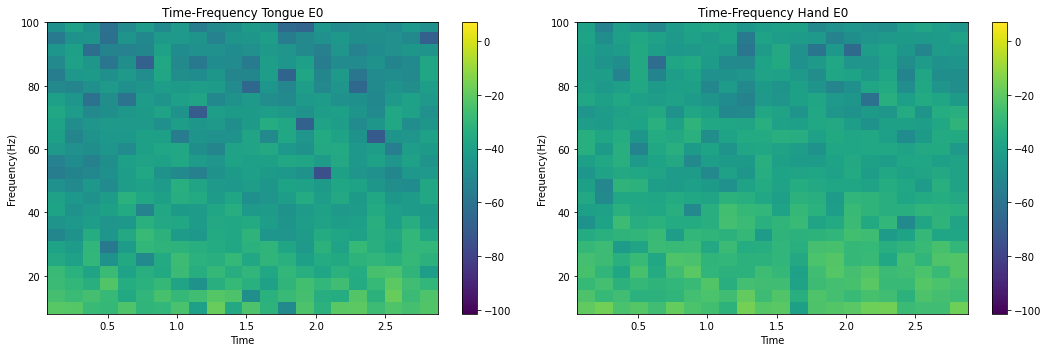

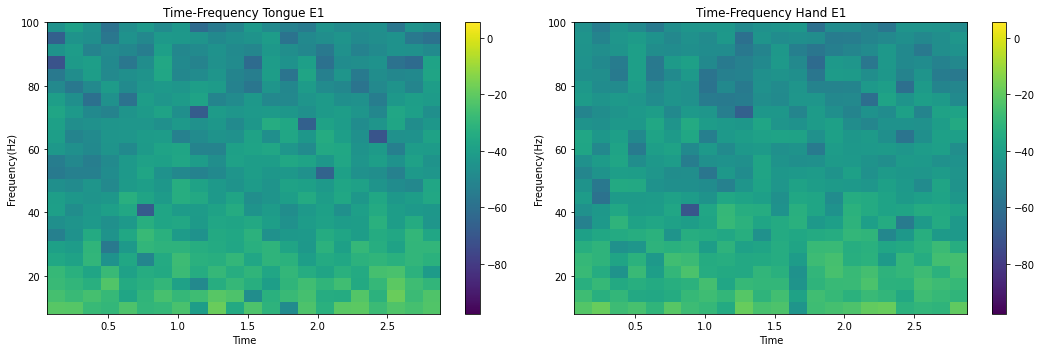

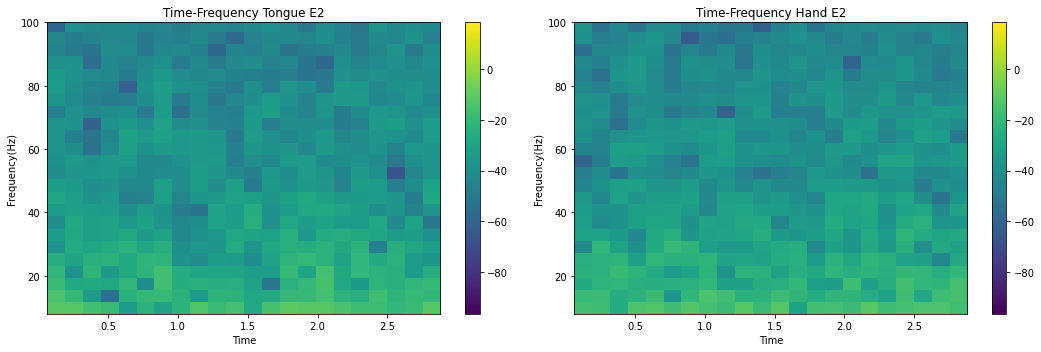

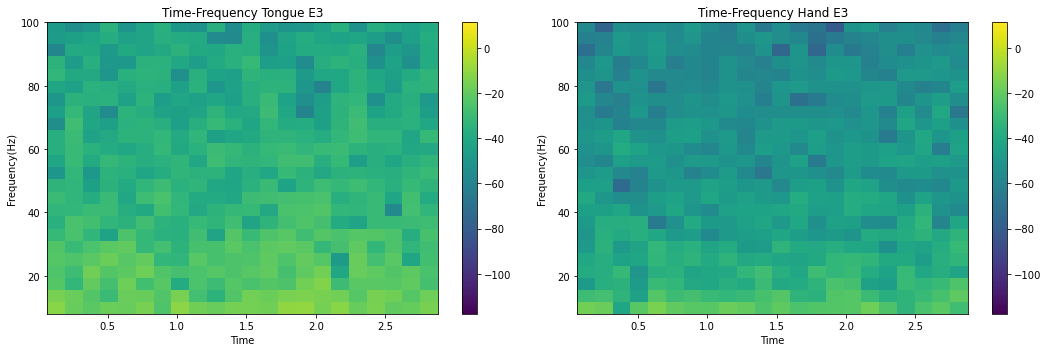

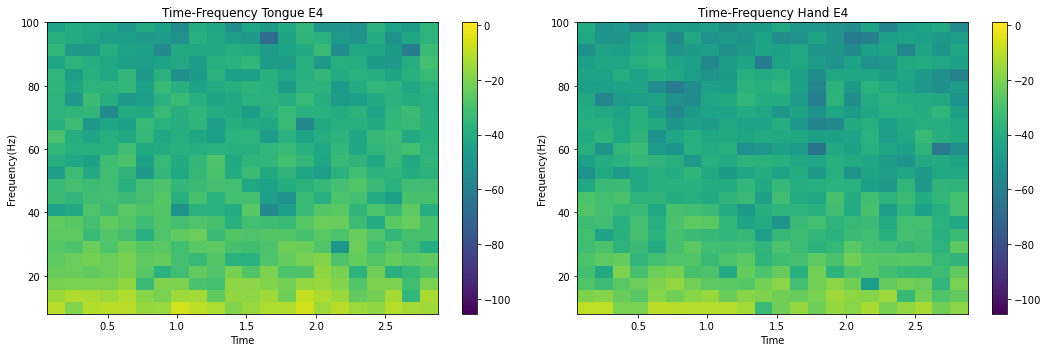

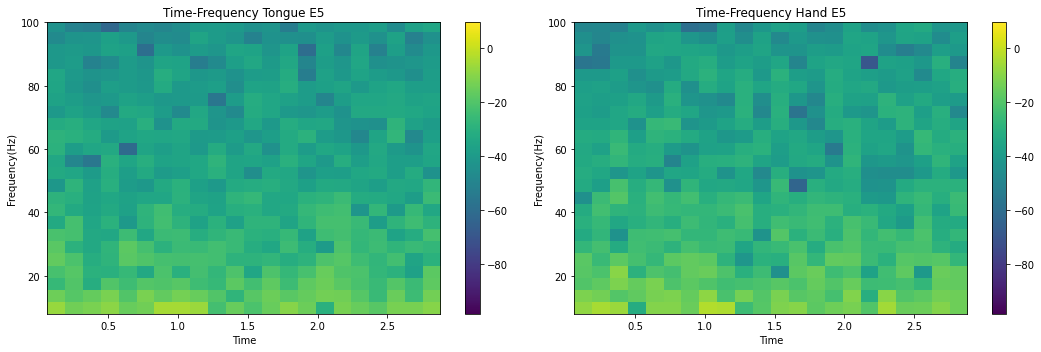

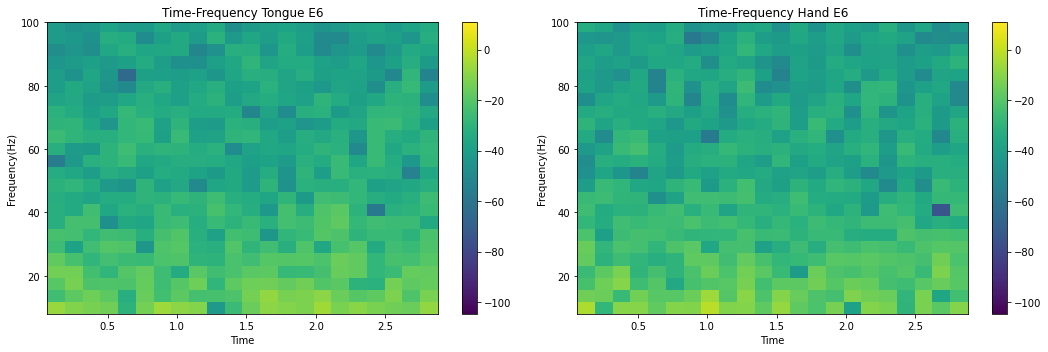

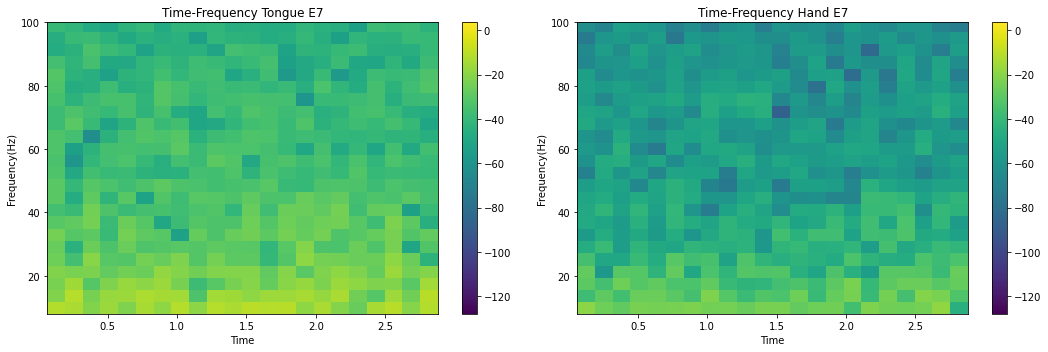

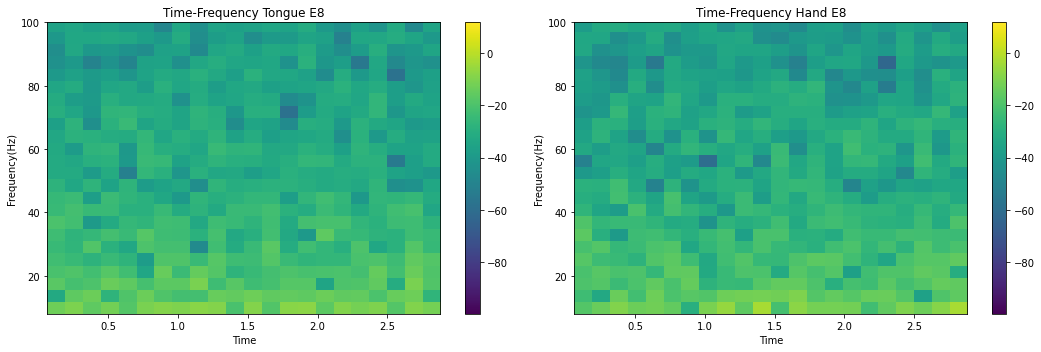

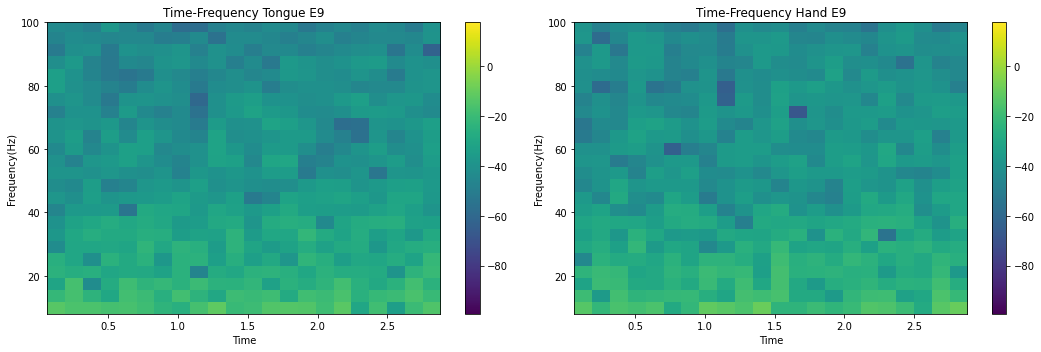

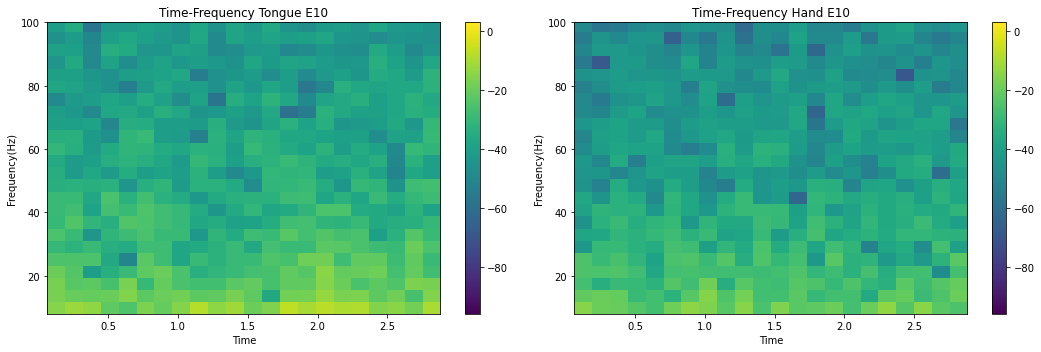

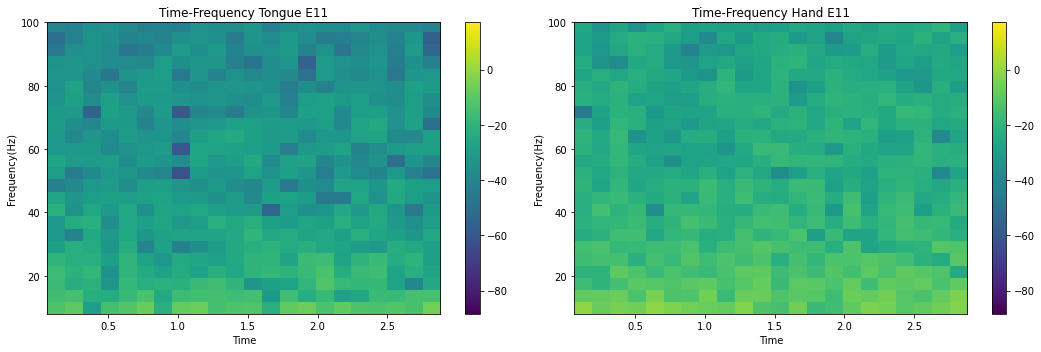

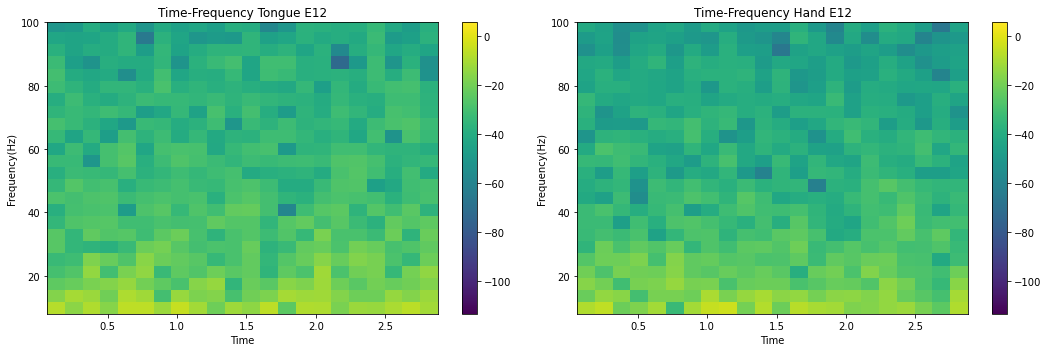

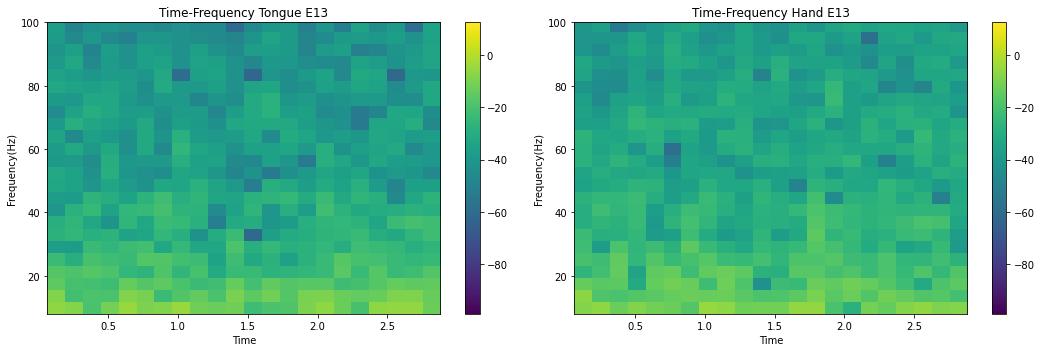

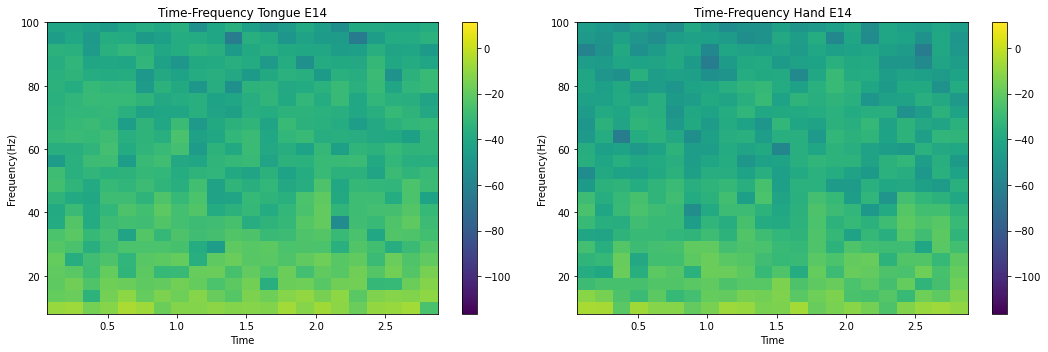

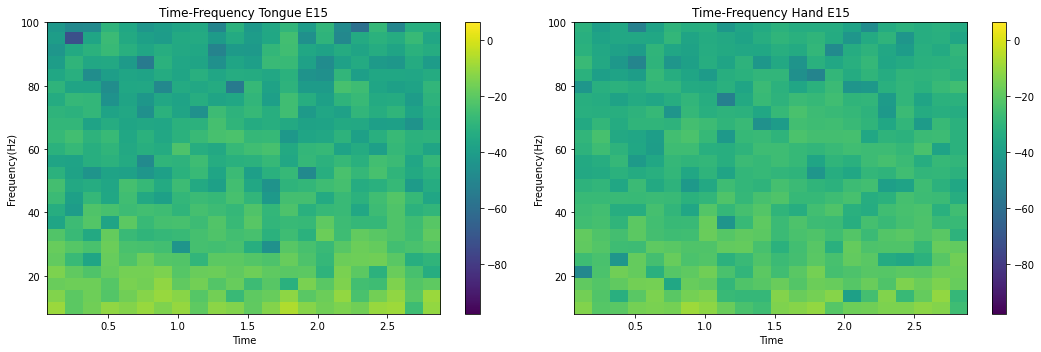

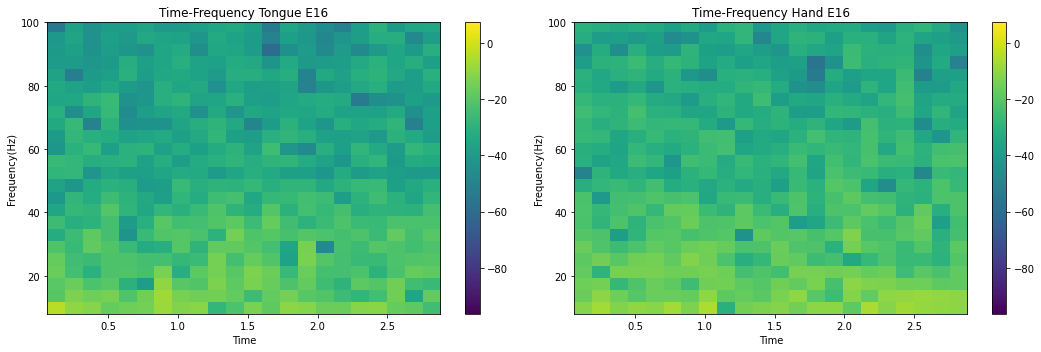

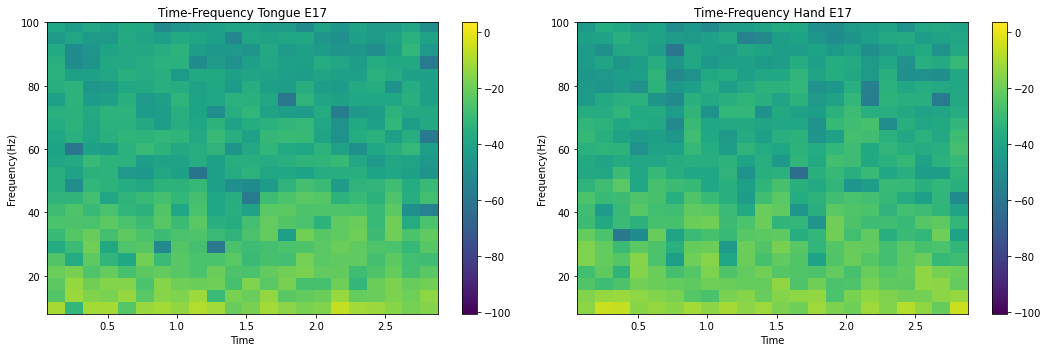

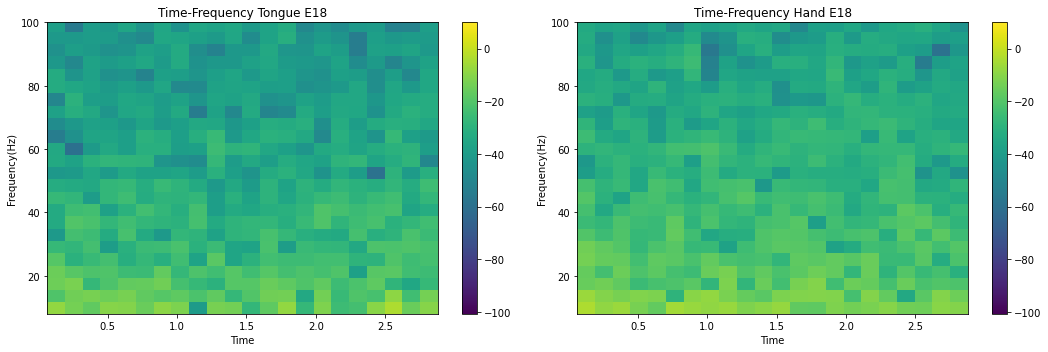

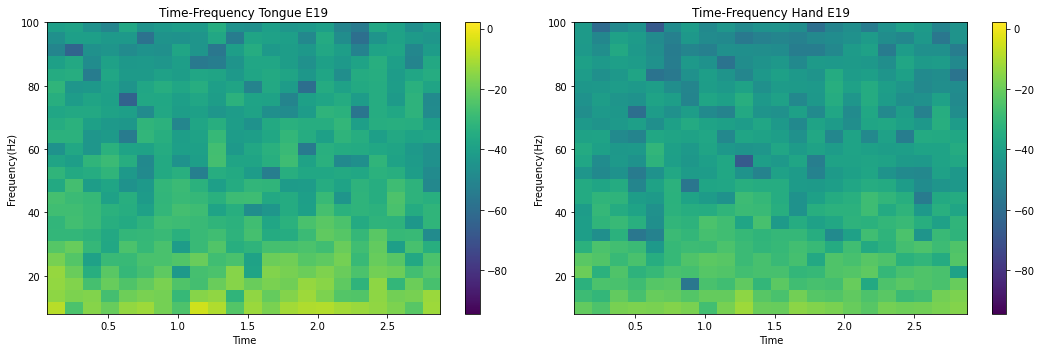

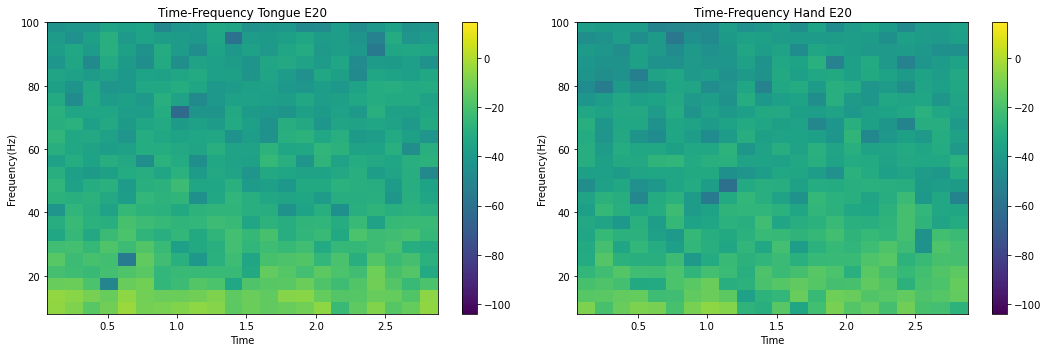

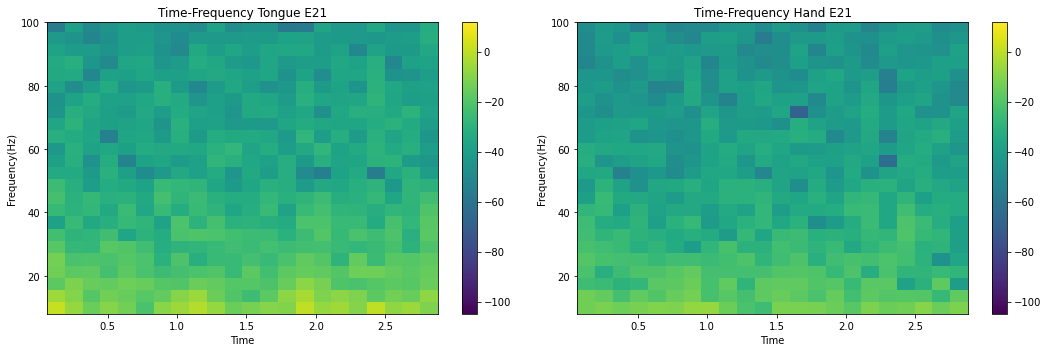

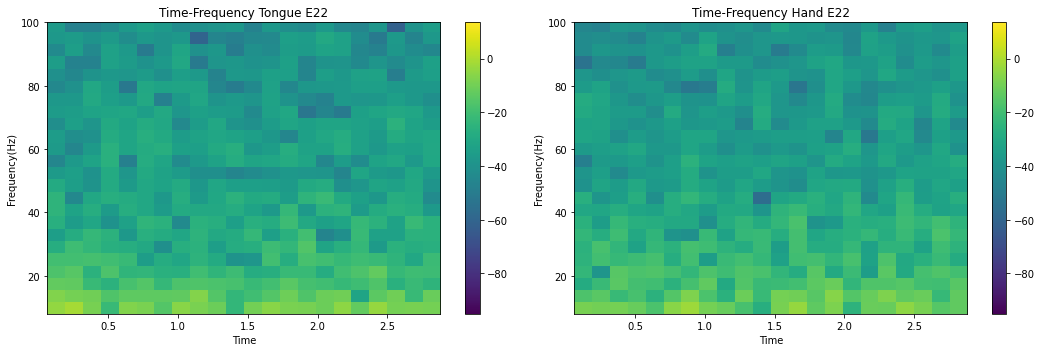

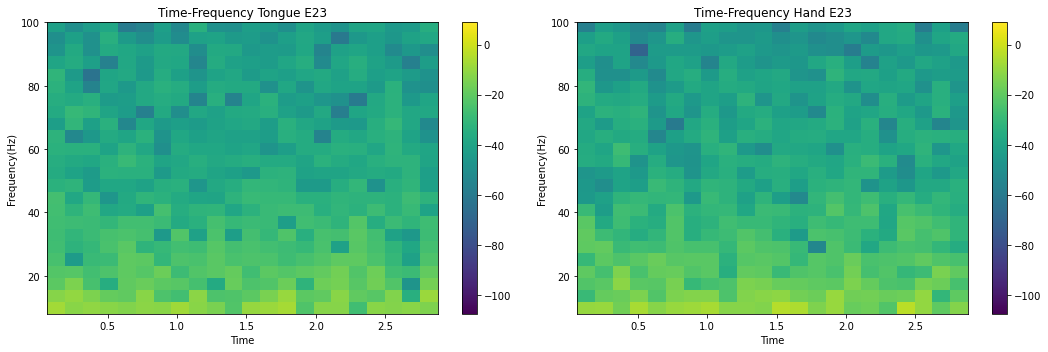

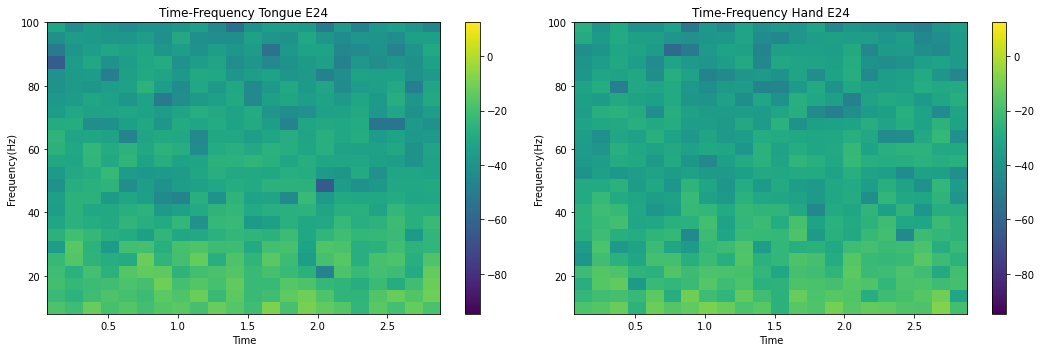

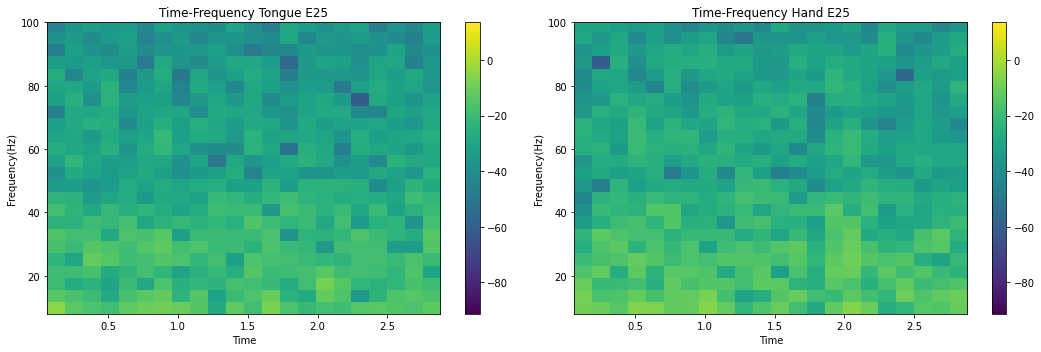

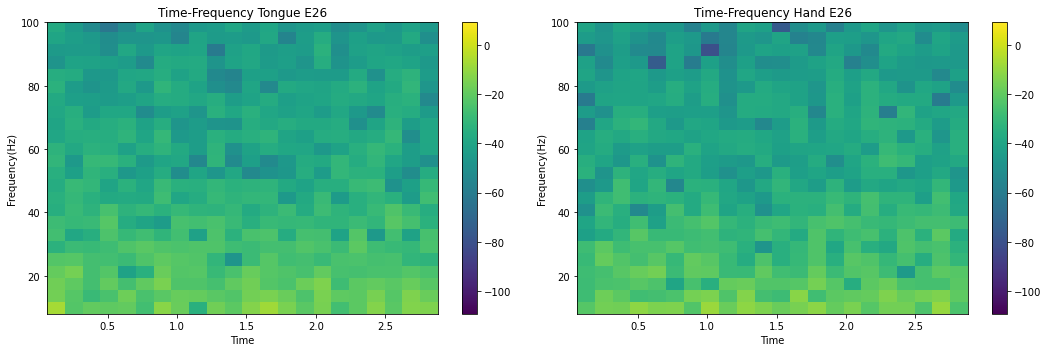

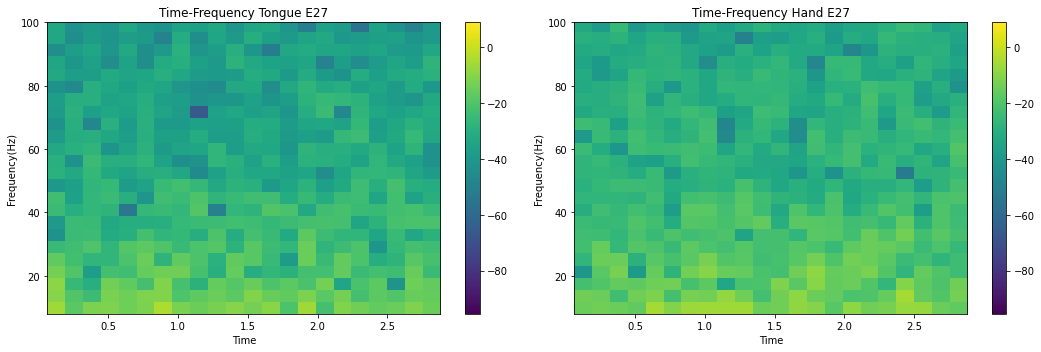

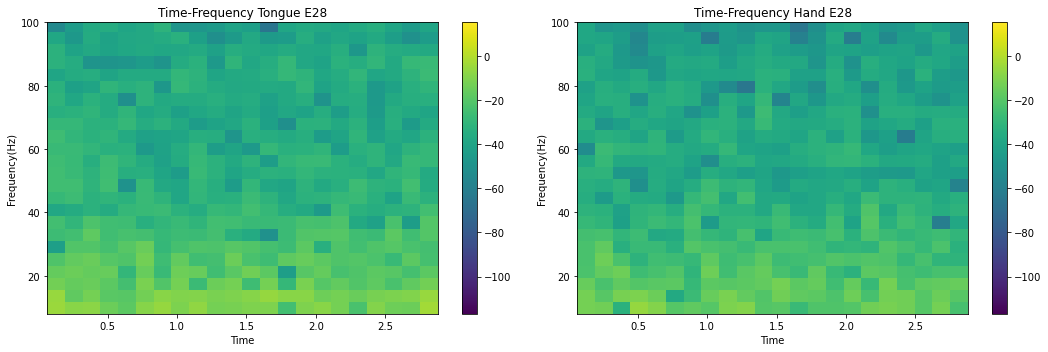

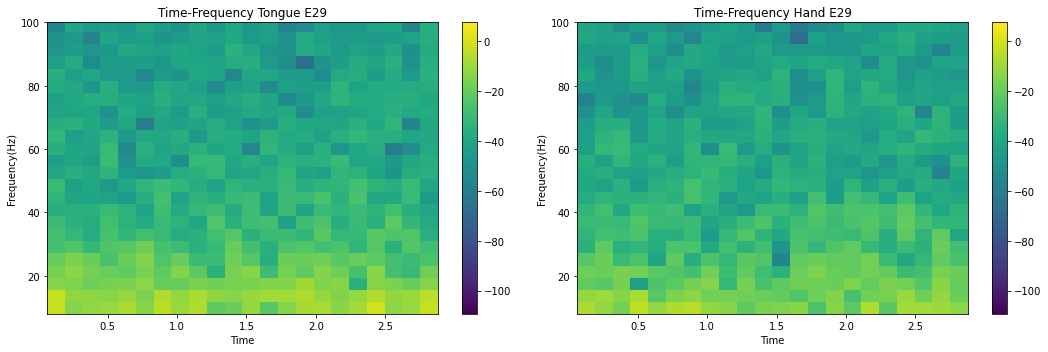

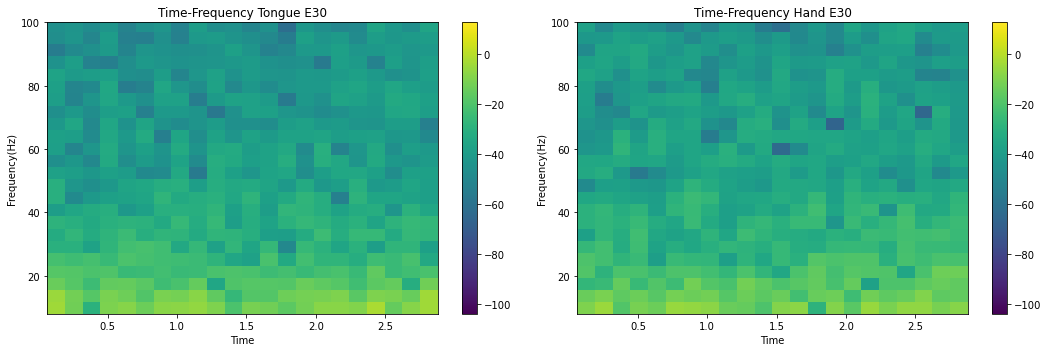

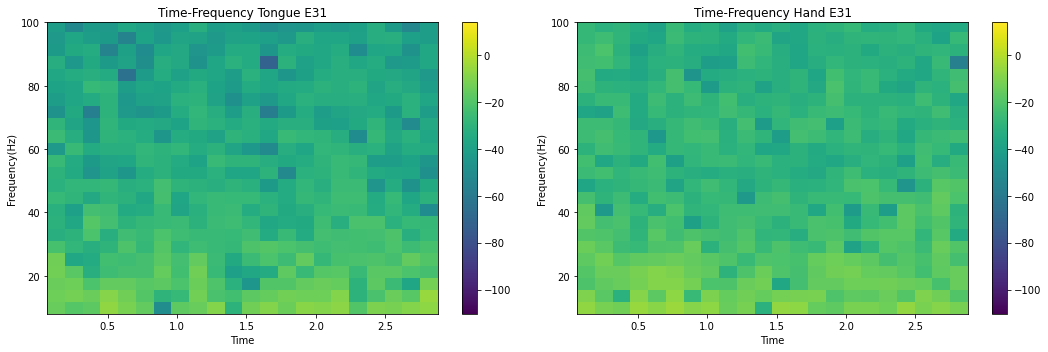

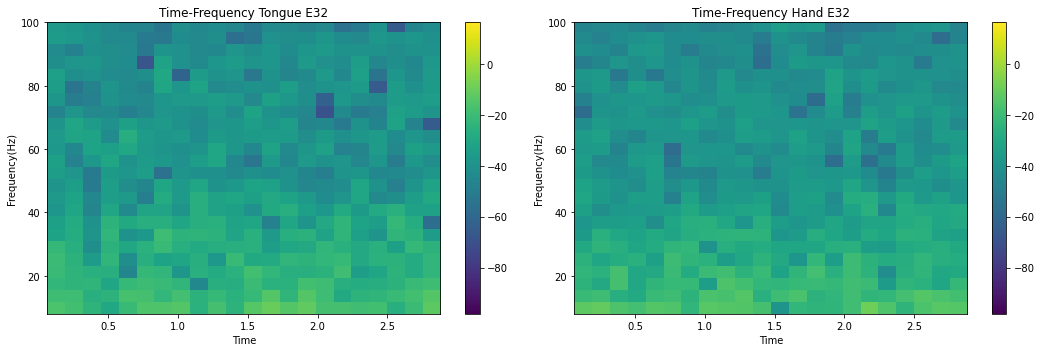

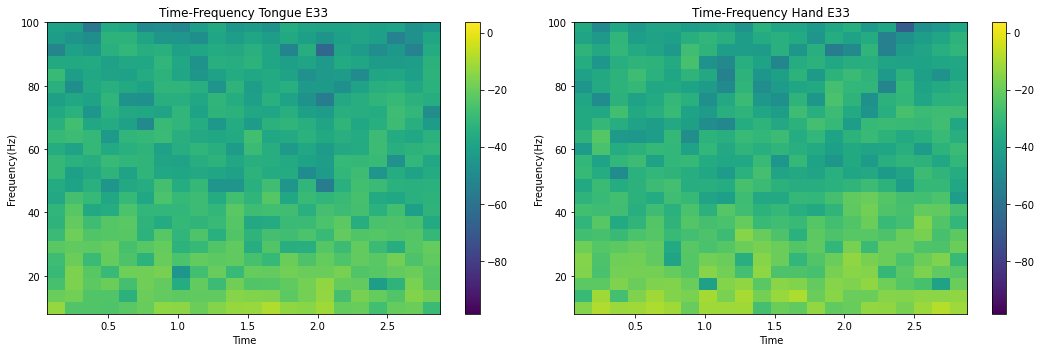

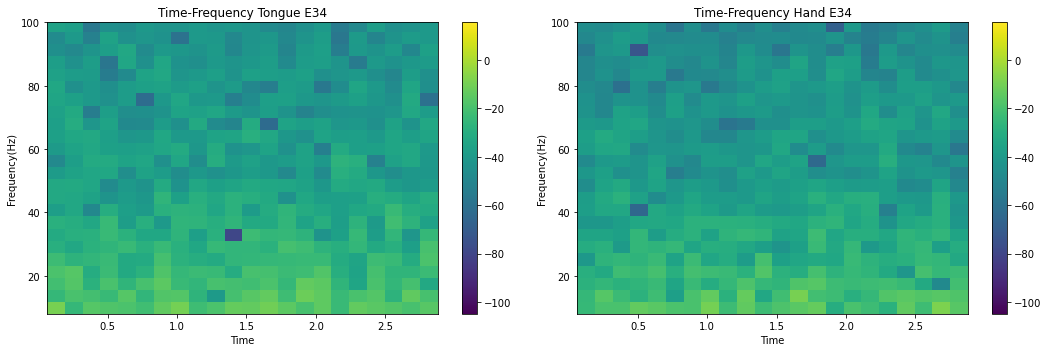

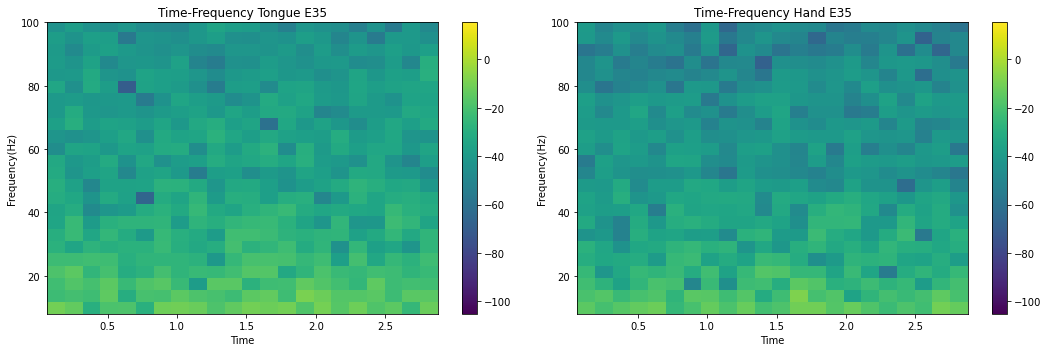

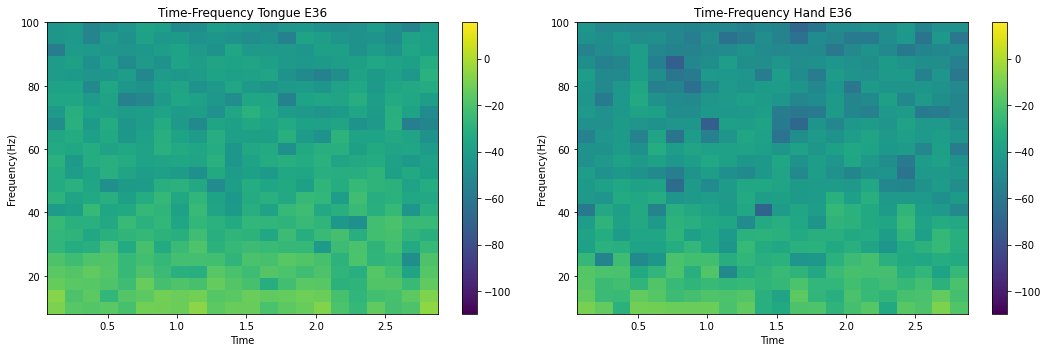

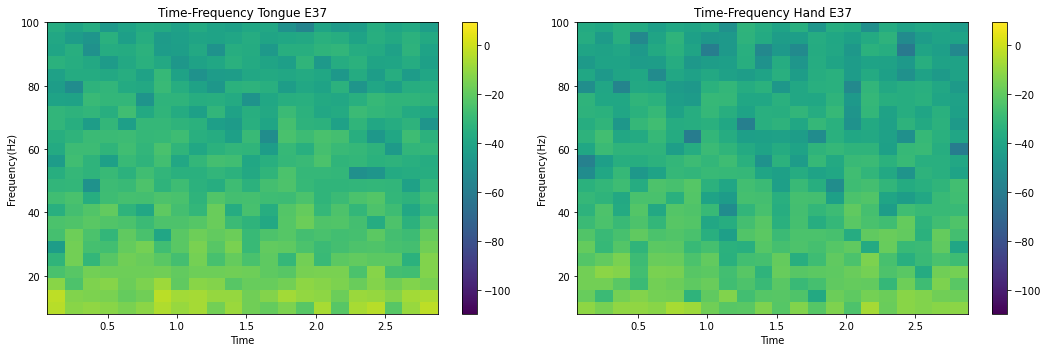

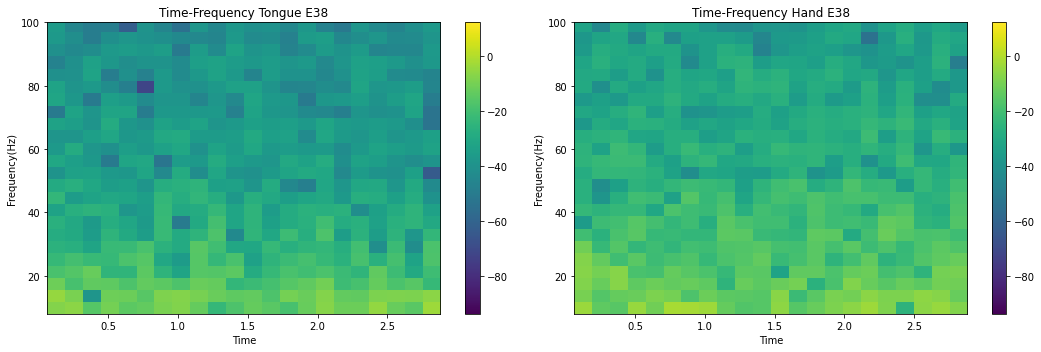

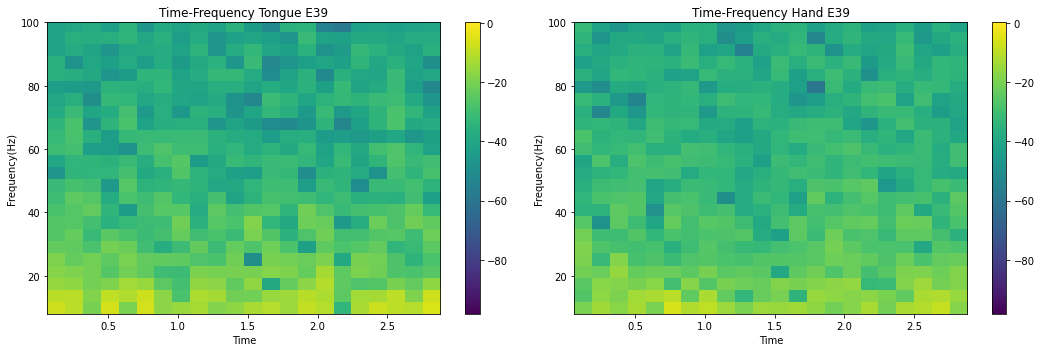

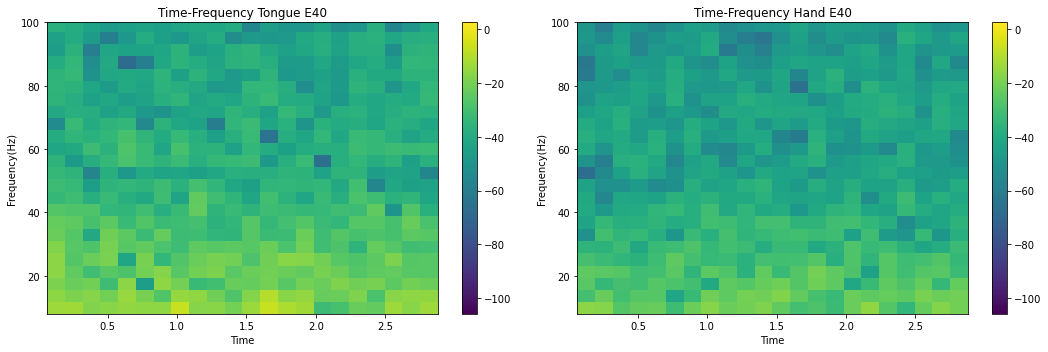

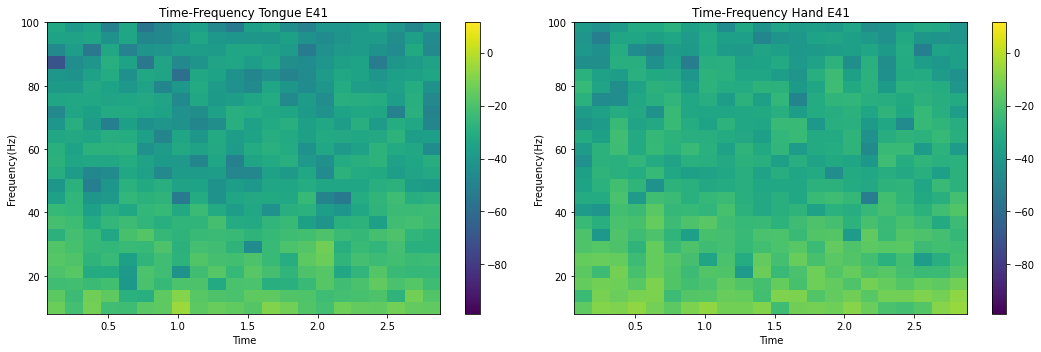

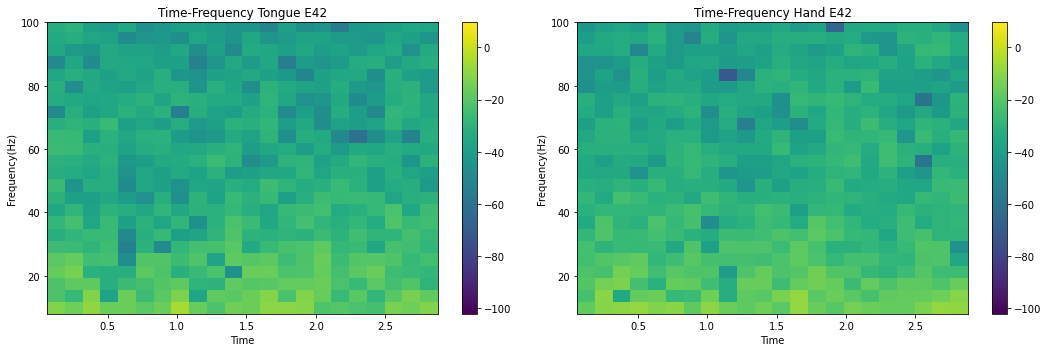

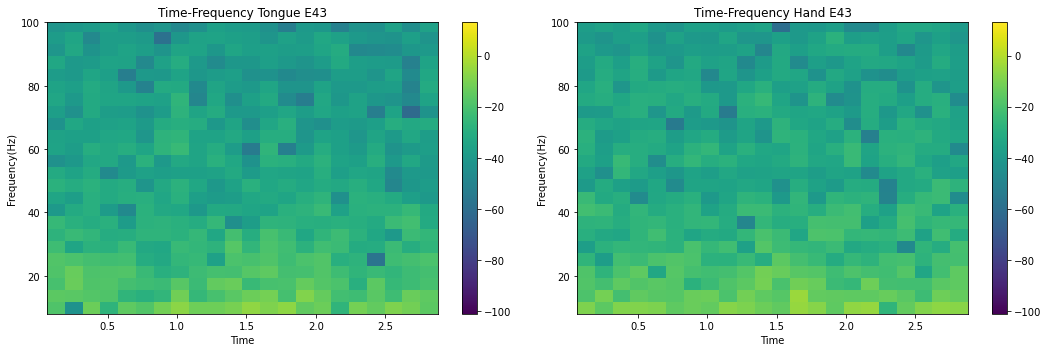

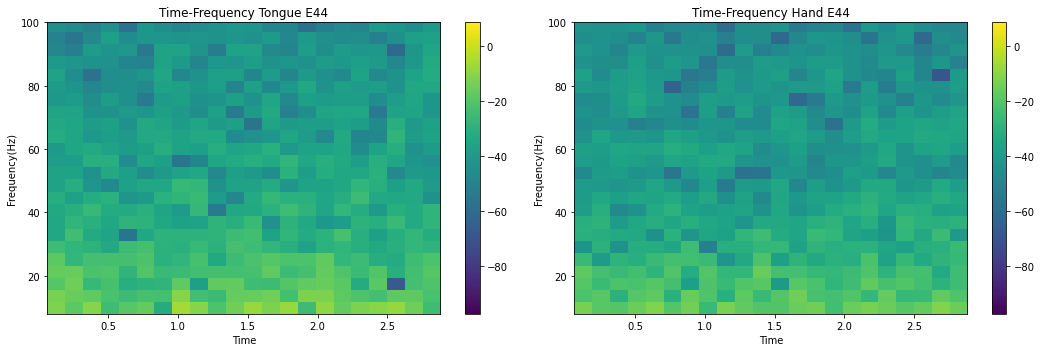

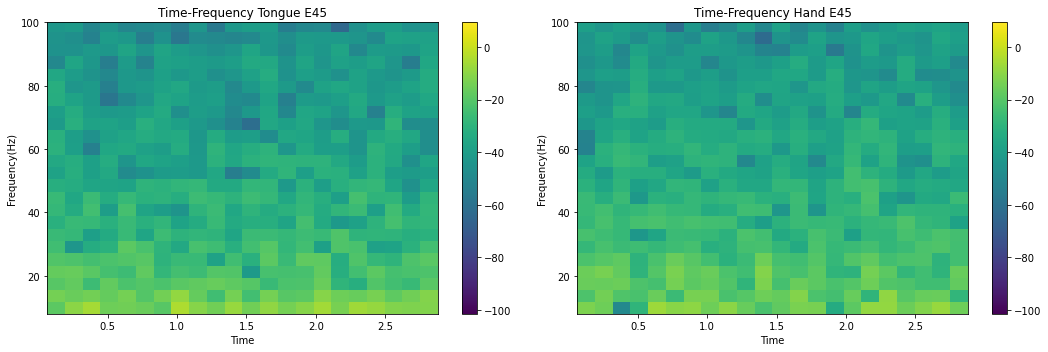

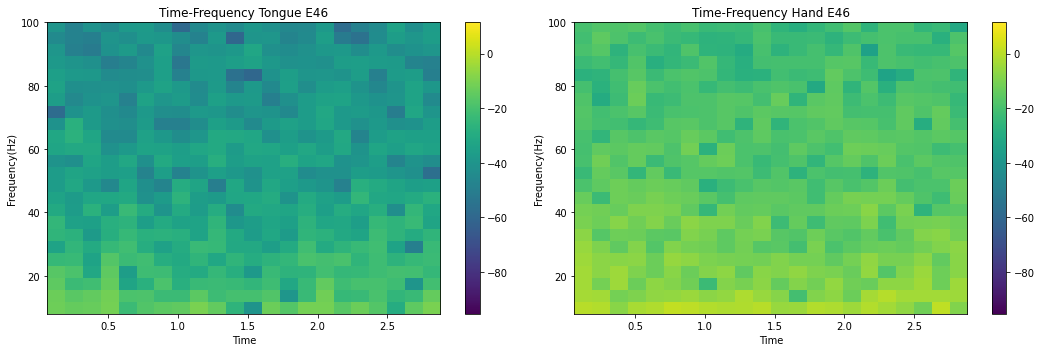

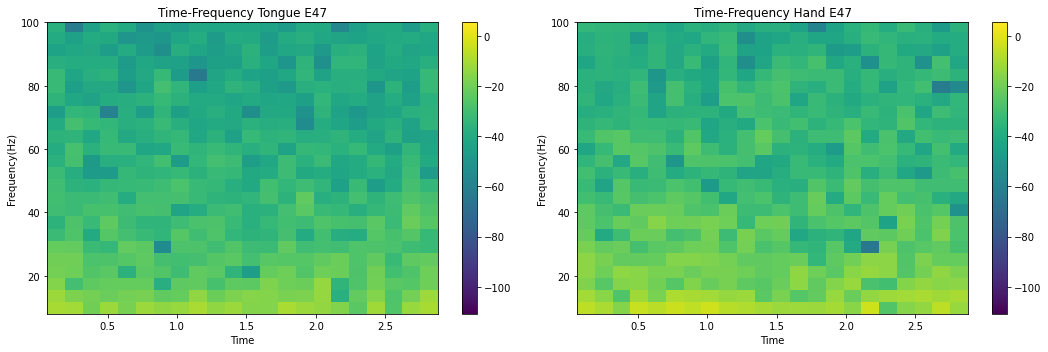

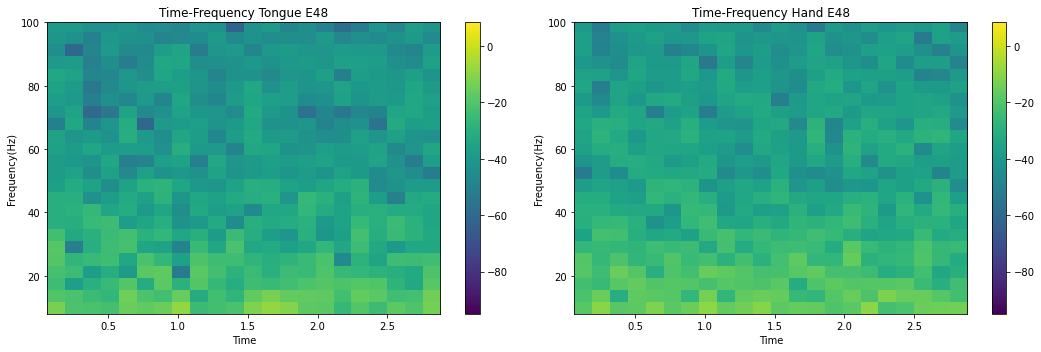

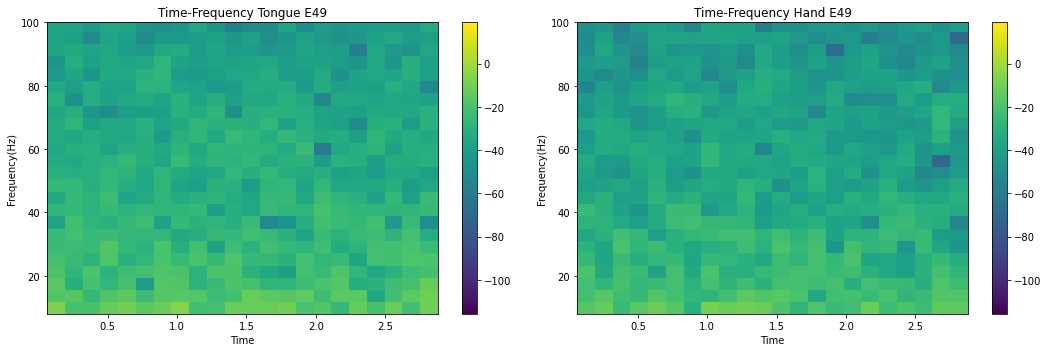

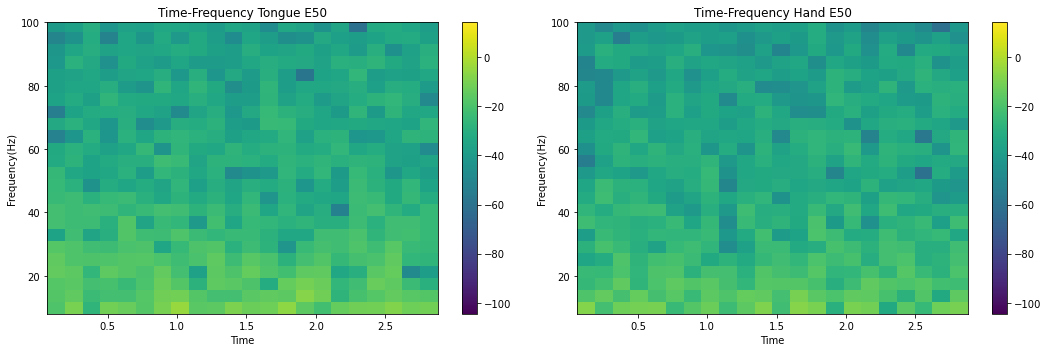

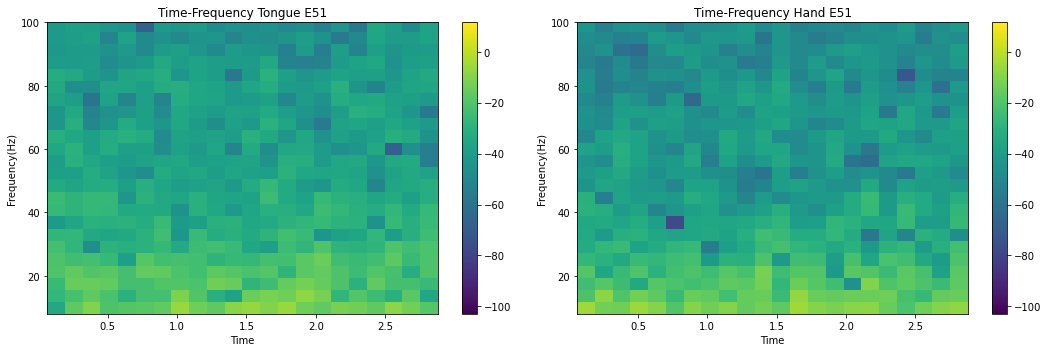

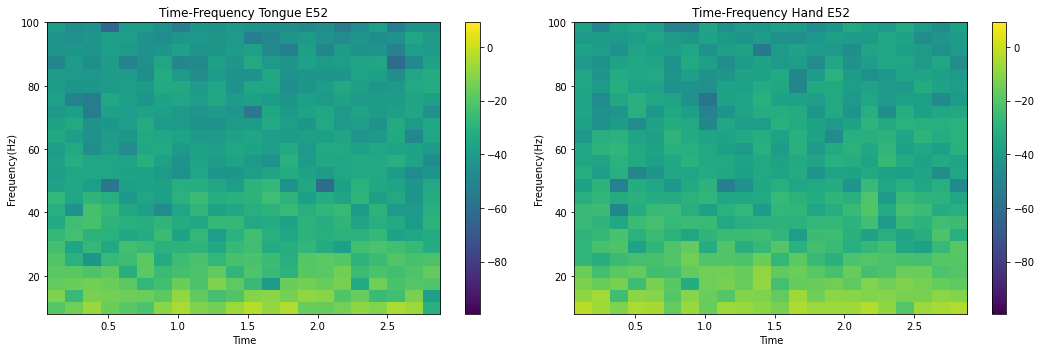

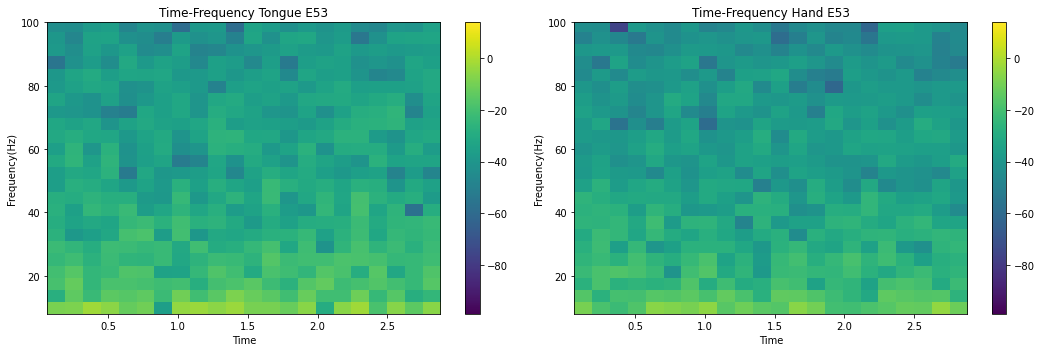

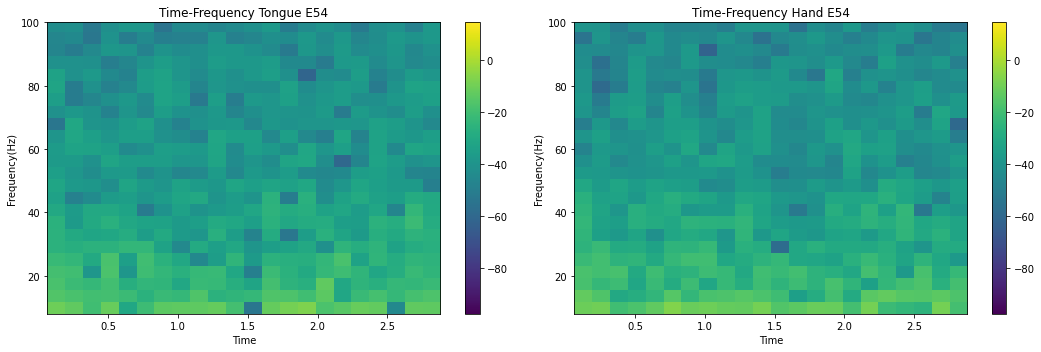

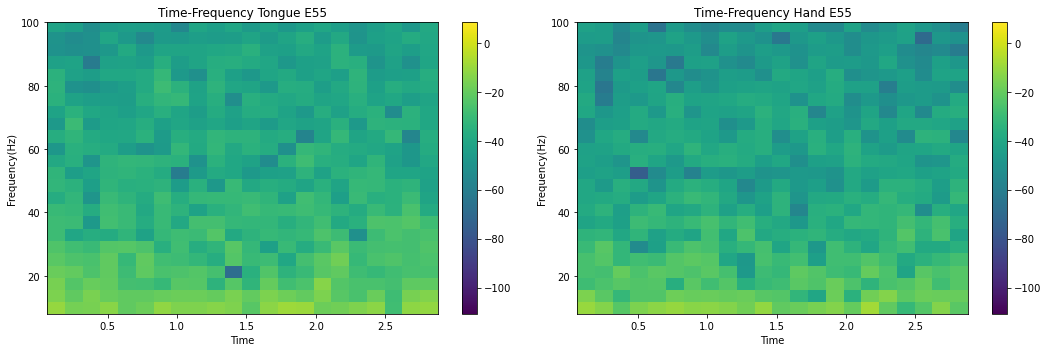

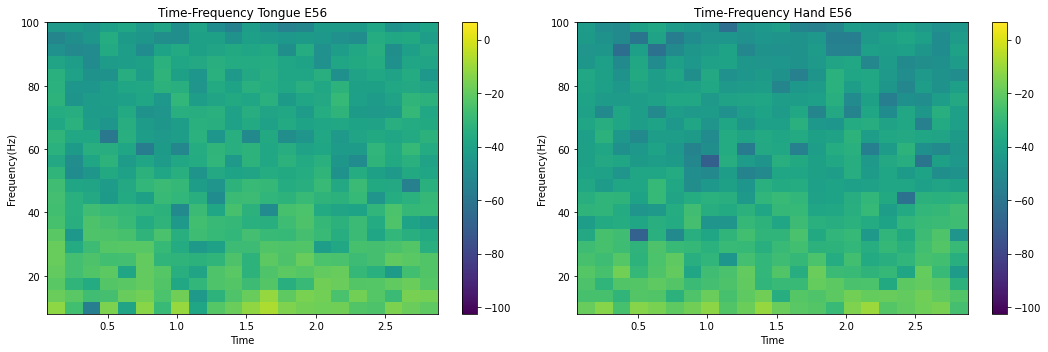

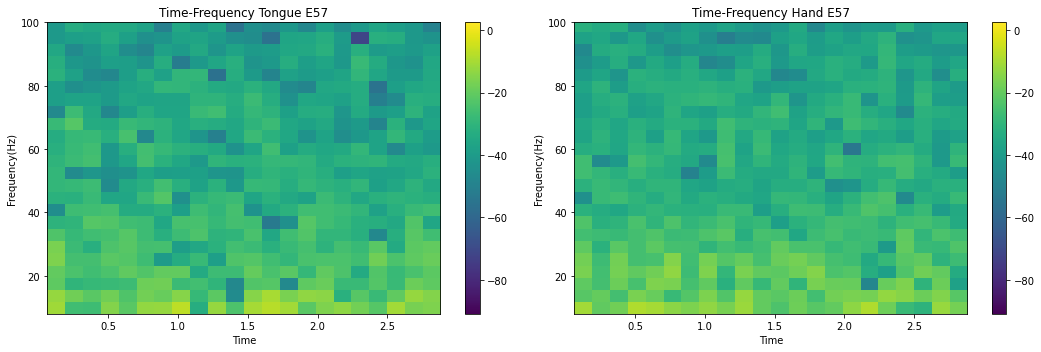

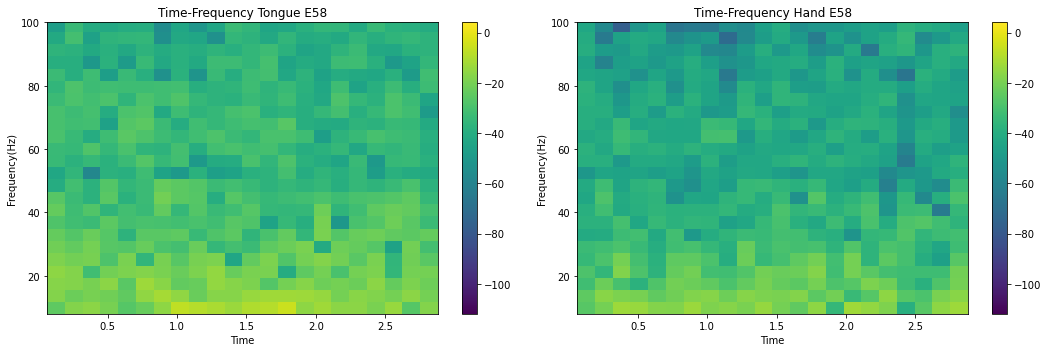

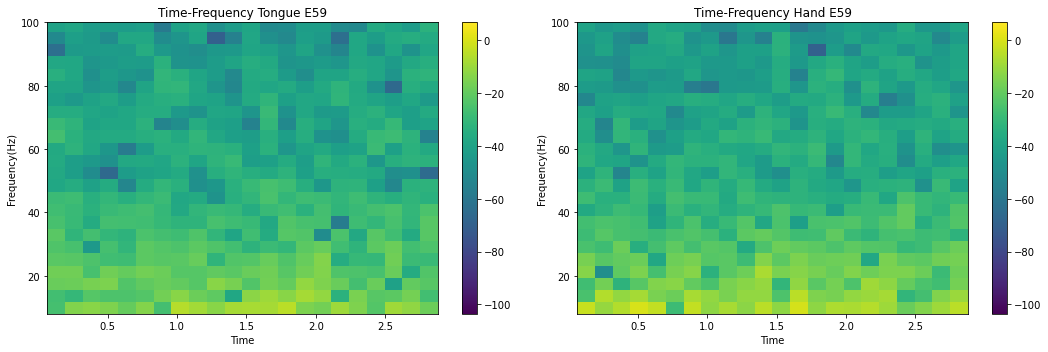

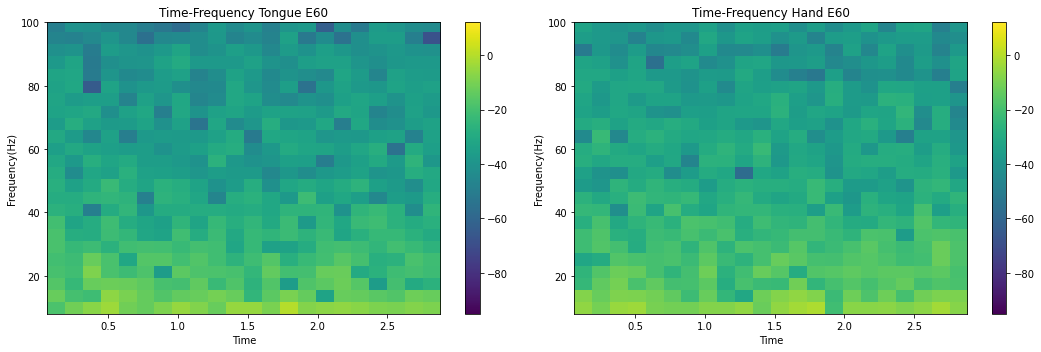

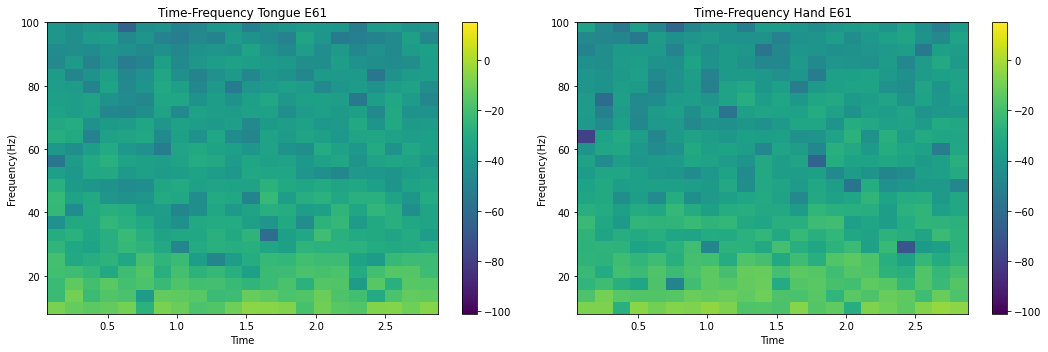

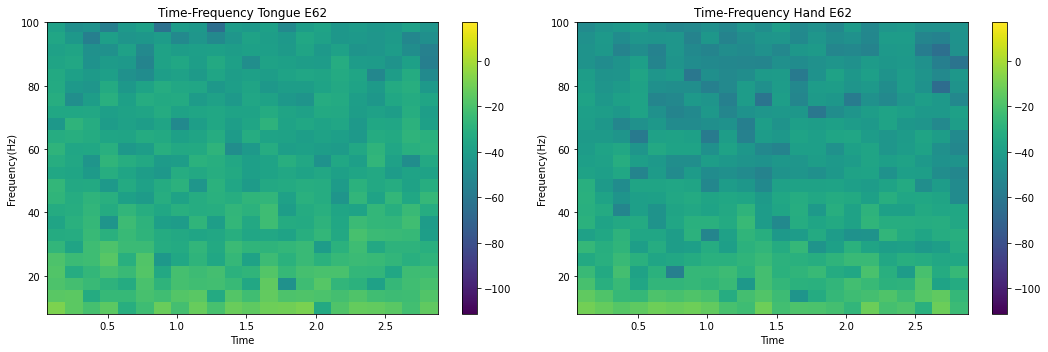

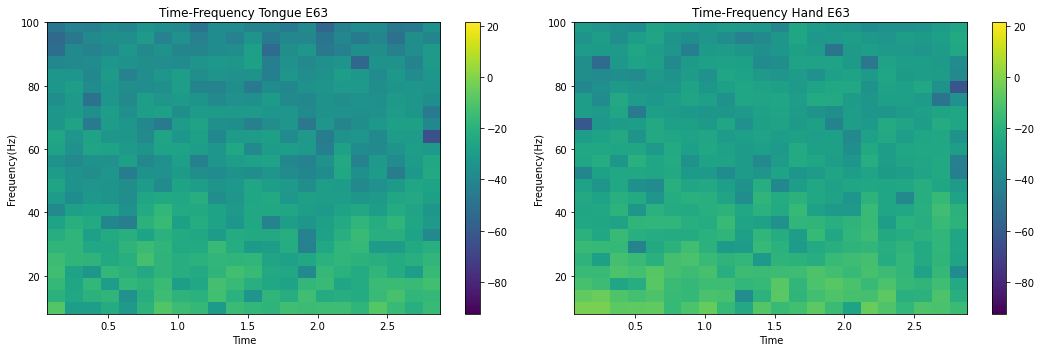

In [9]:
import matplotlib.pyplot as plot

for i in range(0,64):
    

    figure(figsize=(15,5))


    plt.subplot(1, 2, 1)
    
    plt.title("Time-Frequency Tongue E" + str(i))


    powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(np.mean(data_2[np.where(data["events"] == 1)[0], i, :], axis=0), Fs=1000)

    plot.xlabel('Time')

    plot.ylabel('Frequency(Hz)')
    
    #plot.clim(-3,3)

    plot.colorbar(imageAxis)

    plot.ylim((8,100))
    

    plt.subplot(1, 2, 2)
    
    plt.title("Time-Frequency Hand E" + str(i))

    powerSpectrum1, freqenciesFound1, time1, imageAxis1 = plot.specgram(np.mean(data_2[np.where(data["events"] == -1)[0], i, :], axis=0), Fs=1000)

    plot.xlabel('Time')

    plot.ylabel('Frequency(Hz)')
    
    #plot.clim(-3,3)

    plot.colorbar(imageAxis)

    plot.ylim((8,100))



    plot.tight_layout()




In [33]:
data_bp=bandpass(data_2, 8 ,15, 1000)

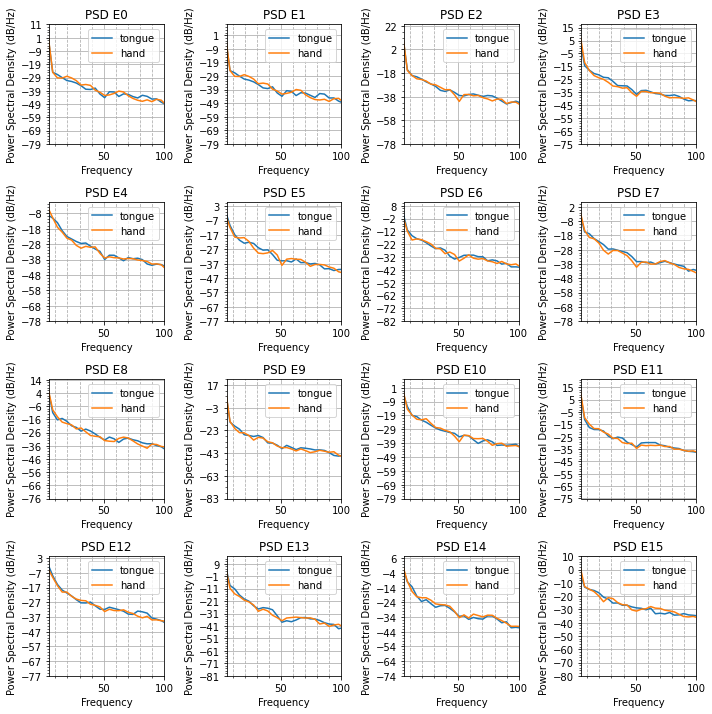

In [29]:
#from matplotlib.ticker import AutoMinorLocator, MultipleLocator
#minor = AutoMinorLocator()
#for i in range(0,61, 4):
    
i = 0 

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))  = plt.subplots(4, 4, figsize=(10,10))
A = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16)

for ax in A:
    
    
    ax.psd(np.mean(data_2[np.where(data["events"] == 1)[0], i, :], axis=0), Fs=1000, label="tongue")
    ax.psd(np.mean(data_2[np.where(data["events"] == -1)[0], i, :], axis=0), Fs=1000, label="hand")
    #ax1.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")

    ax.grid(which = "minor", linestyle='--', axis="x")
    ax.legend()
    ax.minorticks_on()
    ax.set_xlim(5, 100)
    ax.set_title("PSD E" + str(i))
    i = i + 1
    

'''ax2.psd(np.mean(data_2[np.where(data["events"] == 1)[0], i+1, :], axis=0), Fs=1000, label="tongue")
ax2.psd(np.mean(data_2[np.where(data["events"] == -1)[0], i+1, :], axis=0), Fs=1000, label="hand")
#ax2.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")

ax2.grid(which = "minor", linestyle='--', axis="x")
ax2.legend()
ax2.minorticks_on()
ax2.set_xlim(5, 100)
ax2.set_title("PSD E" + str(i+1))

ax3.psd(np.mean(data_2[np.where(data["events"] == 1)[0], i+2, :], axis=0), Fs=1000, label="tongue")
ax3.psd(np.mean(data_2[np.where(data["events"] == -1)[0], i+2, :], axis=0), Fs=1000, label="hand")
#ax3.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")

ax3.grid(which = "minor", linestyle='--', axis="x")
ax3.legend()
ax3.minorticks_on()
ax3.set_xlim(5, 100)
ax3.set_title("PSD E" + str(i+2))

plot.minorticks_on()

ax4.psd(np.mean(data_2[np.where(data["events"] == 1)[0], i+3, :], axis=0), Fs=1000, label="tongue")
ax4.psd(np.mean(data_2[np.where(data["events"] == -1)[0], i+3, :], axis=0), Fs=1000, label="hand")
#ax4.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")

ax4.grid(which = "minor", linestyle='--', axis="x")
ax4.legend()
ax4.minorticks_on()
ax4.set_xlim(5, 100)
ax4.set_title("PSD E" + str(i+3))'''

plot.tight_layout()



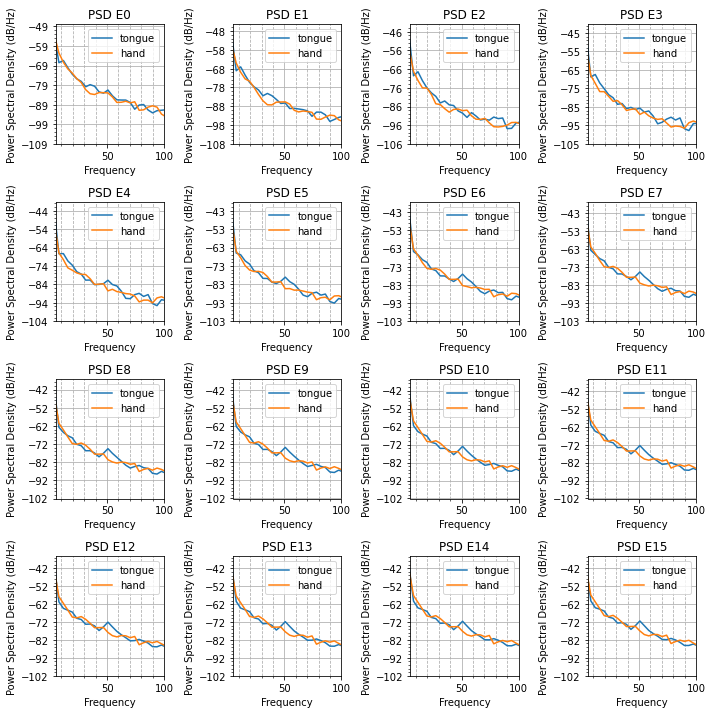

In [34]:
    
i = 0 

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))  = plt.subplots(4, 4, figsize=(10,10))
A = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16)

for ax in A:
    
    
    ax.psd(np.mean(data_bp[np.where(data["events"] == 1)[0], i, :], axis=0), Fs=1000, label="tongue")
    ax.psd(np.mean(data_bp[np.where(data["events"] == -1)[0], i, :], axis=0), Fs=1000, label="hand")
    #ax1.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")

    ax.grid(which = "minor", linestyle='--', axis="x")
    ax.legend()
    ax.minorticks_on()
    ax.set_xlim(5, 100)
    ax.set_title("PSD E" + str(i))
    i = i + 1
    
plot.tight_layout()
    

'for signal in mysignals2:\n    axb.plot(signal[\'x\'], signal[\'y\'], \n            color=signal[\'color\'], \n            linewidth=signal[\'linewidth\'],\n            label=signal[\'name\'])\n\n# Enable legend\naxb.legend()\naxb.grid()\naxb.set(xlabel=\'time (s)\', ylabel=\'voltage (mV)\')\naxb.set_title("ERP E" + str(i+1))\n\nfor signal in mysignals3:\n    axc.plot(signal[\'x\'], signal[\'y\'], \n            color=signal[\'color\'], \n            linewidth=signal[\'linewidth\'],\n            label=signal[\'name\'])\n\n# Enable legend\naxc.legend()\naxc.grid()\naxc.set(xlabel=\'time (s)\', ylabel=\'voltage (mV)\')\naxc.set_title("ERP E" + str(i+2))\n\nfor signal in mysignals4:\n    axd.plot(signal[\'x\'], signal[\'y\'], \n            color=signal[\'color\'], \n            linewidth=signal[\'linewidth\'],\n            label=signal[\'name\'])\n\n# Enable legend\naxd.legend()\naxd.grid()\naxd.set(xlabel=\'time (s)\', ylabel=\'voltage (mV)\')\naxd.set_title("ERP E" + str(i+3))\n\nplot.t

<Figure size 432x288 with 0 Axes>

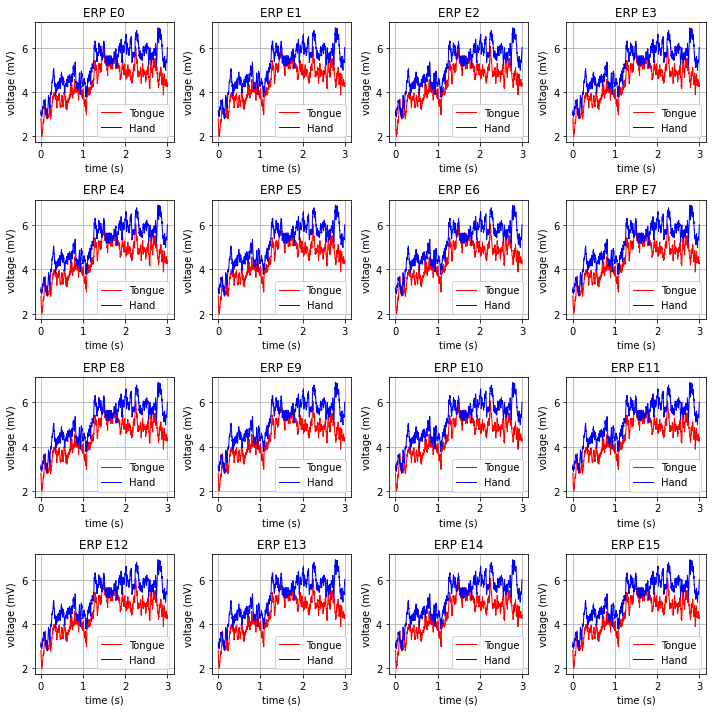

In [28]:
#for i in range(0, 3):


#for i in range(0,61,4):
i = 0
#figure(figsize=(20,100))
signals = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
             'y': np.mean(data_2[np.where(data["events"] == 1)[0], i, :], axis=0), 'color':'r', 'linewidth':1},
            {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
             'y': np.mean(data_2[np.where(data["events"] == -1)[0], i, :], axis=0), 'color':'b', 'linewidth':1},
            ]

'''mysignals2 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
             'y': np.mean(data_2[np.where(data["events"] == 1)[0], i+1, :], axis=0), 'color':'r', 'linewidth':1},
            {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
             'y': np.mean(data_2[np.where(data["events"] == -1)[0], i+1, :], axis=0), 'color':'b', 'linewidth':1},
           ]

mysignals3 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
             'y': np.mean(data_2[np.where(data["events"] == 1)[0], i+2, :], axis=0), 'color':'r', 'linewidth':1},
            {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
             'y': np.mean(data_2[np.where(data["events"] == -1)[0], i+2, :], axis=0), 'color':'b', 'linewidth':1},
            ]

mysignals4 = [{'name': 'Tongue', 'x': np.arange(0.0,3.0,0.001),
             'y': np.mean(data_2[np.where(data["events"] == 1)[0], i+3, :], axis=0), 'color':'r', 'linewidth':1},
            {'name': 'Hand', 'x': np.arange(0.0,3.0,0.001),
             'y': np.mean(data_2[np.where(data["events"] == -1)[0], i+3, :], axis=0), 'color':'b', 'linewidth':1},
             ]
'''
#list = [mysignals1, mysignals2, mysignals3, mysignals4]
plot.tight_layout()

#print(A[0][0])
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))  = plt.subplots(4, 4, figsize=(10,10))
A = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16)
#for i in range(0, 12, 4):
    
 
#for signal in mysignals1:
for ax in A:
    for signal in signals:
        ax.plot(signal['x'], signal['y'], 
                color=signal['color'], 
                linewidth=signal['linewidth'],
                label=signal['name'])

        # Enable legend
    ax.legend()
    ax.grid()
    ax.set(xlabel='time (s)', ylabel='voltage (mV)')
    ax.set_title("ERP E" + str(i))
    i = i+1
    #plt.show()
    plot.tight_layout()

'''for signal in mysignals2:
    axb.plot(signal['x'], signal['y'], 
            color=signal['color'], 
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
axb.legend()
axb.grid()
axb.set(xlabel='time (s)', ylabel='voltage (mV)')
axb.set_title("ERP E" + str(i+1))

for signal in mysignals3:
    axc.plot(signal['x'], signal['y'], 
            color=signal['color'], 
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
axc.legend()
axc.grid()
axc.set(xlabel='time (s)', ylabel='voltage (mV)')
axc.set_title("ERP E" + str(i+2))

for signal in mysignals4:
    axd.plot(signal['x'], signal['y'], 
            color=signal['color'], 
            linewidth=signal['linewidth'],
            label=signal['name'])

# Enable legend
axd.legend()
axd.grid()
axd.set(xlabel='time (s)', ylabel='voltage (mV)')
axd.set_title("ERP E" + str(i+3))

plot.tight_layout()
#plt.show()'''

In [10]:

data_2_roll=np.rollaxis(data_2,0, 3)


In [13]:
import scipy.signal 

def bandpass(trials, lo, hi, sample_rate):
    '''
    Designs and applies a bandpass filter to the signal.
    
    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEGsignal
    lo : float
        Lower frequency bound (in Hz)
    hi : float
        Upper frequency bound (in Hz)
    sample_rate : float
        Sample rate of the signal (in Hz)
    
    Returns
    -------
    trials_filt : 3d-array (channels x samples x trials)
        The bandpassed signal
    '''

    # The iirfilter() function takes the filter order: higher numbers mean a sharper frequency cutoff,
    # but the resulting signal might be shifted in time, lower numbers mean a soft frequency cutoff,
    # but the resulting signal less distorted in time. It also takes the lower and upper frequency bounds
    # to pass, divided by the niquist frequency, which is the sample rate divided by 2:
    a, b = scipy.signal.iirfilter(6, [lo/(sample_rate/2.0), hi/(sample_rate/2.0)])

    # Applying the filter to each trial
    ntrials = trials.shape[2]
    nchannels=trials.shape[0]
    nsamples=trials.shape[1]
    trials_filt = np.zeros((nchannels, nsamples, ntrials))
    for i in range(ntrials):
        trials_filt[:,:,i] = scipy.signal.filtfilt(a, b, trials[:,:,i], axis=1)
    
    return trials_filt

In [15]:
data_2_bp=bandpass(data_2_roll, 8, 15, 1000)
data_bp=np.rollaxis(data_2_bp, 2, 0)
data_bp.shape

(278, 64, 3000)

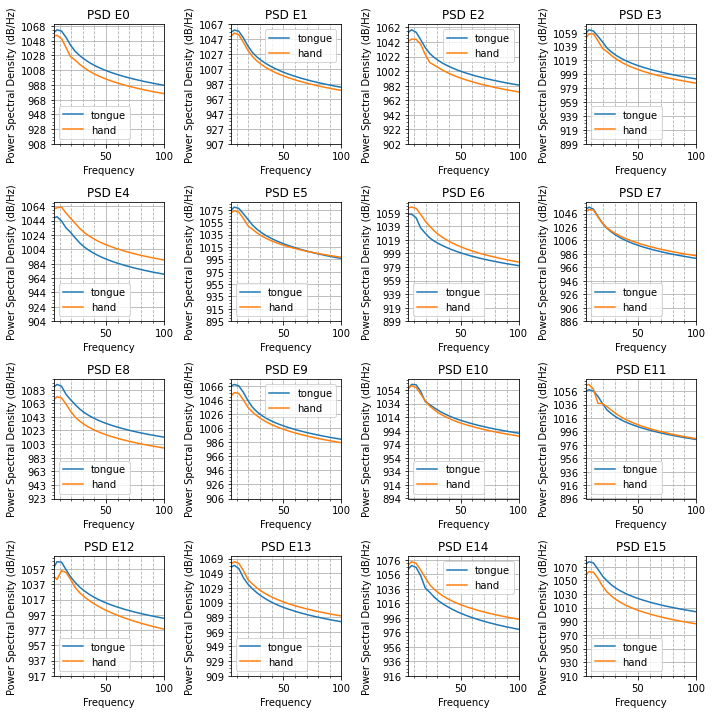

In [18]:
    
i = 0 

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16))  = plt.subplots(4, 4, figsize=(10,10))
A = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16)

for ax in A:
    
    
    ax.psd(np.mean(data_bp[np.where(data["events"] == 1)[0], i, :], axis=0), Fs=1000, label="tongue")
    ax.psd(np.mean(data_bp[np.where(data["events"] == -1)[0], i, :], axis=0), Fs=1000, label="hand")
    #ax1.psd(np.mean(data_2[np.where(data["y"] == 0)[0], i+3, :], axis=0), Fs=1000, label="rest")

    ax.grid(which = "minor", linestyle='--', axis="x")
    ax.legend()
    ax.minorticks_on()
    ax.set_xlim(5, 100)
    ax.set_title("PSD E" + str(i))
    i = i + 1
    
plot.tight_layout()
    

In [11]:
data_2_tung=data_2_roll[ :, :, np.where(data["events"] == 1)[0],]
data_2_hand=data_2_roll[ :, :, np.where(data["events"] == -1)[0],]
data_2_hand.shape

(64, 3000, 139)

In [12]:
# Calculate the log(var) of the trials
def logvar(trials):
    
    return np.log(np.var(trials, axis=1))

In [13]:
data_logvar_tung=logvar(data_2_tung)
data_logvar_hand=logvar(data_2_hand)

In [14]:
data_logvar_hand[:, 0]

array([3.43159211, 3.45245109, 4.65711329, 4.97845214, 5.68570415,
       5.23714468, 5.29026799, 4.46104734, 5.19192768, 4.81046141,
       5.22324435, 5.36107911, 6.0878409 , 5.59269422, 5.49632504,
       5.19019386, 6.07340992, 4.69468122, 5.36891123, 5.53659708,
       5.72422854, 6.57127205, 5.84680185, 5.28848157, 5.76431979,
       5.9365654 , 6.10695444, 5.40596397, 5.44646127, 5.35003121,
       5.07775664, 5.17113443, 4.52110285, 5.46740643, 5.2656229 ,
       5.47773887, 5.26465306, 5.68415901, 5.25411827, 5.09434262,
       4.51006982, 5.45576985, 5.44952123, 5.85829783, 5.4047723 ,
       5.51125533, 5.19334914, 5.08727879, 4.37761662, 5.56548167,
       5.65682244, 6.13485455, 6.36977434, 6.16943135, 5.14582595,
       4.88925029, 5.0920954 , 4.6889224 , 5.76172297, 5.92236347,
       6.15129126, 6.16553011, 5.22638429, 5.3767204 ])

In [15]:
trials_logvar = {"cl1": data_logvar_hand,
                 "cl2": data_logvar_tung}

In [16]:
nchannels=data_2.shape[1]
nsamples=data_2.shape[2]
ntrials=data_2.shape[0]

In [17]:
def plot_logvar(trials):
    '''
    Plots the log-var of each channel/component.
    arguments:
        trials - Dictionary containing the trials (log-vars x trials) for 2 classes.
    '''
    plt.figure(figsize=(12,5))
    
    x0 = np.arange(nchannels)
    x1 = np.arange(nchannels) + 0.4

    y0 = np.mean(trials["cl1"], axis=1)
    y1 = np.mean(trials["cl2"], axis=1)

    plt.bar(x0, y0, width=0.5, color='b')
    plt.bar(x1, y1, width=0.4, color='r')

    plt.xlim(-1, nchannels+0.5)

    plt.gca().yaxis.grid(True)
    plt.title('log-var of each channel/component')
    plt.xlabel('channels/components')
    plt.ylabel('log-var')
    #plt.legend(cl_lab)

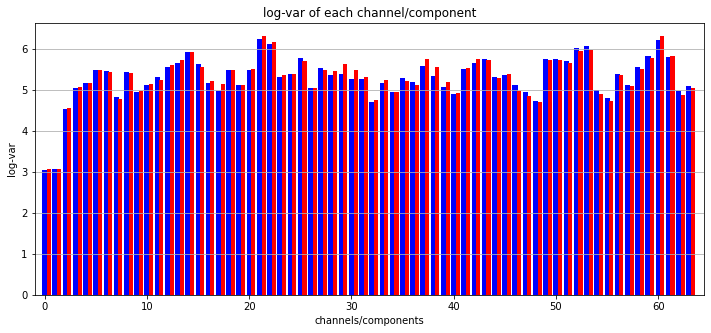

In [18]:
plot_logvar(trials_logvar)

In [19]:
from numpy import linalg

def cov(trials):
    ''' Calculate the covariance for each trial and return their average '''
    ntrials = trials.shape[2]
    covs = [ trials[:,:,i].dot(trials[:,:,i].T) / nsamples for i in range(ntrials) ]
    return np.mean(covs, axis=0)

def whitening(sigma):
    ''' Calculate a whitening matrix for covariance matrix sigma. '''
    U, l, _ = linalg.svd(sigma)
    return U.dot( np.diag(l ** -0.5) )

def csp(trials_r, trials_f):
    '''
    Calculate the CSP transformation matrix W.
    arguments:
        trials_r - Array (channels x samples x trials) containing right hand movement trials
        trials_f - Array (channels x samples x trials) containing foot movement trials
    returns:
        Mixing matrix W
    '''
    cov_r = cov(trials_r)
    cov_f = cov(trials_f)
    P = whitening(cov_r + cov_f)
    B, _, _ = linalg.svd( P.T.dot(cov_f).dot(P) )
    W = P.dot(B)
    return W

def apply_mix(W, trials):
    ''' Apply a mixing matrix to each trial (basically multiply W with the EEG signal matrix)'''
    ntrials = trials.shape[2]
    trials_csp = np.zeros((nchannels, nsamples, ntrials))
    for i in range(ntrials):
        trials_csp[:,:,i] = W.T.dot(trials[:,:,i])
    return trials_csp

In [20]:

# Apply the functions
W = csp(data_2_hand, data_2_tung)
trials_csp = {"cl1": apply_mix(W, data_2_hand),
              "cl2": apply_mix(W, data_2_tung)}

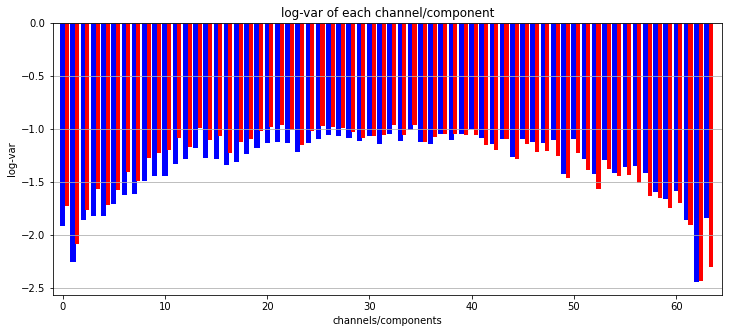

In [21]:
trials_logvar = {"cl1": logvar(trials_csp["cl1"]),
                 "cl2": logvar(trials_csp["cl2"])}
plot_logvar(trials_logvar)

In [22]:
def plot_scatter(left, foot):
    plt.figure()
    plt.scatter(left[0,:], left[-1,:], color='b')
    plt.scatter(foot[0,:], foot[-1,:], color='r')
    plt.xlabel('Last component')
    plt.ylabel('First component')
    #plt.legend(cl_lab)


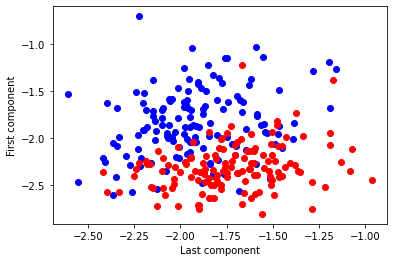

In [23]:
plot_scatter(trials_logvar["cl1"], trials_logvar["cl2"])

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:

data_2_reshape=np.reshape(data_2, (278,192000))
labels=data['events']
labels=np.reshape(labels, (278,))
print(labels.shape)
lda = LinearDiscriminantAnalysis()

(278,)


In [26]:
X_r2=lda.fit(data_2_reshape, labels).transform(data_2_reshape)


In [27]:
array=np.repeat(0,139)
X_r2.shape
afsd=np.where([labels==1])
afsd


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  1,   4,   5,   6,   8,  12,  14,  16,  17,  19,  22,  25,  26,
         27,  32,  34,  36,  37,  42,  44,  45,  48,  49,  50,  54,  56,
         58,  61,  62,  65,  66,  69,  72,  73,  78,  79,  81,  82,  83,
         85,  86,  88,  89,  90,  92,  94,  95,  96,  97, 102, 105, 106,
        109, 110, 111, 117, 118, 119, 120, 123, 125, 128, 129, 131, 133,
        134, 136, 137, 139, 140, 141, 142, 143, 144, 147, 152, 153, 154,
        157, 158, 159, 161, 162, 163, 164, 165, 167, 169, 170, 171, 173,
 

(139, 1)


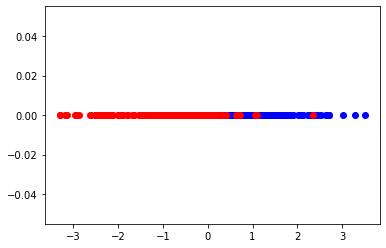

In [28]:
X_r2_b=X_r2[np.where([labels==1])[1], :]
X_r2_r=X_r2[np.where([labels==-1])[1], :]
print(X_r2_b.shape)
plt.scatter(X_r2_b[:,0], array, color='b')
plt.scatter(X_r2_r[:,0], array, color='r')

In [29]:
X_r2


array([[ 0.21416637],
       [ 1.03031881],
       [-1.52813146],
       [-0.25955442],
       [ 0.81336038],
       [ 1.6523515 ],
       [ 1.77590605],
       [-2.47847468],
       [ 2.01748495],
       [-2.0013128 ],
       [-1.06386462],
       [-0.05090493],
       [ 1.59319916],
       [-0.96882776],
       [ 1.83650201],
       [ 0.15367849],
       [-0.38348924],
       [ 1.6801954 ],
       [-0.62647681],
       [-0.08146996],
       [-0.80176944],
       [-1.98537447],
       [ 0.66569703],
       [-0.51746968],
       [-2.33207   ],
       [-0.73300159],
       [ 2.7137905 ],
       [ 1.16941775],
       [ 0.01836103],
       [-0.6345051 ],
       [-1.45589601],
       [-0.54198822],
       [ 2.69635823],
       [-0.78485153],
       [ 2.64253196],
       [-3.28725509],
       [ 0.8944396 ],
       [ 0.84525712],
       [-2.93693778],
       [ 0.7116224 ],
       [-1.47236067],
       [ 0.11401487],
       [ 0.10024827],
       [-0.42866215],
       [ 1.36682724],
       [ 0

In [9]:
#2ND BEST ALGORITHM

In [9]:
data_2.shape

(278, 64, 3000)

In [10]:
data_2_new=data_2[:,(29,30,31,32,37,38,39,40),:]
data_2_new.shape

(278, 8, 3000)

In [11]:
##ICA

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

In [13]:
ica = FastICA(n_components=3)
#data_ica=[]
#for i in range(278):
data_ica=ica.fit_transform(data_2_new[0,:,:].T)


C:\Users\Ritwik\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [14]:
data_ica[:,0].shape

(3000,)

In [15]:
data_ica.shape

(3000, 3)

In [17]:
##AR coefficients

In [30]:
data_trial=data_2_new[0,:,:].T
data_trial.shape

(3000, 8)

In [35]:
data_trial_s1=data_trial[0:1000,:]
print(data_trial_s1.shape)
data_trial_s2=data_trial[1000:2000,:]
print(data_trial_s2.shape)
data_trial_s3=data_trial[2000:3000,:]
print(data_trial_s3.shape)

(1000, 8)
(1000, 8)
(1000, 8)


In [43]:
import statsmodels.api as sm
#from statsmodels.datasets.sunspots import load
#data = load()
ARFV=np.array([])

for i in range(8):
    rho1, sigma1 = sm.regression.linear_model.burg(data_trial_s1[:,i], order=2)
    rho2, sigma2 = sm.regression.linear_model.burg(data_trial_s2[:,i], order=2)
    rho3, sigma3 = sm.regression.linear_model.burg(data_trial_s3[:,i], order=2)
    ARFV=np.append(ARFV, (rho1, rho2, rho3))
    
print(ARFV) 


[ 1.729073   -0.73344458  1.78756724 -0.79449015  1.80490408 -0.80867376
  1.70665282 -0.71159601  1.73363205 -0.74111544  1.77948474 -0.78361884
  1.76239661 -0.7725245   1.80309194 -0.8207853   1.8179891  -0.8278702
  1.76870046 -0.77654034  1.80838872 -0.8218295   1.82137984 -0.83110251
  1.76349452 -0.77598801  1.77223766 -0.78487364  1.80147797 -0.80733074
  1.78424342 -0.79266128  1.77687455 -0.78775986  1.80580036 -0.81277904
  1.71321914 -0.7256078   1.74791264 -0.75876539  1.79592663 -0.80630946
  1.78513129 -0.79585158  1.79904828 -0.81624653  1.8199261  -0.8304815 ]


In [20]:
##Haar wavelet decomposition

In [46]:
import pywt
HWDFV=np.array([])
for i in range(8):
    (cA, cD) = pywt.dwt(data_trial[:,i], 'haar')
    HWDFV=np.append(HWDFV, cA)

In [49]:
 HWDFV.shape

(12000,)

In [50]:
##Spectral Power Estimates

In [52]:
SPFV=np.array([])
for i in range(8):
    f1, Pxx_den1 = signal.welch(data_trial_s1[:,i], 1000)
    f2, Pxx_den2 = signal.welch(data_trial_s2[:,i], 1000)
    f3, Pxx_den3 = signal.welch(data_trial_s3[:,i], 1000)
    SPFV=np.append(SPFV, (Pxx_den1, Pxx_den2, Pxx_den3))

In [53]:
SPFV.shape

(3096,)

In [55]:
#Concatenaton of All the feature vectors
concated=np.concatenate((ARFV, HWDFV, SPFV), axis=None)
concated.shape

(15144,)

In [16]:
#subsampling by 4 
data_2_sub=data_2_new
data_2_subs=np.zeros((278, 8, 750))
for i in range(278):
    for j in range(8):
        data_2_subs[i, j, :]=signal.resample(data_2_sub[i, j, :], 750)

data_2_subs.shape

(278, 8, 750)

In [17]:
final = np.array([])
for j in range(278):
    data_trial=data_2_subs[j,:,:].T
    #data_trial.shape

    data_trial_s1=data_trial[0:250,:]
    #print(data_trial_s1.shape)
    data_trial_s2=data_trial[250:500,:]
    #print(data_trial_s2.shape)
    data_trial_s3=data_trial[500:750,:]
    #print(data_trial_s3.shape)

    #AR Coefficients
    import statsmodels.api as sm
    #from statsmodels.datasets.sunspots import load
    #data = load()
    ARFV=np.array([])

    for i in range(8):
        rho1, sigma1 = sm.regression.linear_model.burg(data_trial_s1[:,i], order=2)
        rho2, sigma2 = sm.regression.linear_model.burg(data_trial_s2[:,i], order=2)
        rho3, sigma3 = sm.regression.linear_model.burg(data_trial_s3[:,i], order=2)
        ARFV=np.append(ARFV, (rho1, rho2, rho3))

    #print(ARFV) 

    #Haar wavelet
    import pywt
    HWDFV=np.array([])
    for i in range(8):
        (cA, cD) = pywt.dwt(data_trial[:,i], 'haar')
        HWDFV=np.append(HWDFV, cA)

    #Spectral Power estimates
    SPFV=np.array([])
    for i in range(8):
        f1, Pxx_den1 = signal.welch(data_trial_s1[:,i], 250)
        f2, Pxx_den2 = signal.welch(data_trial_s2[:,i], 250)
        f3, Pxx_den3 = signal.welch(data_trial_s3[:,i], 250)
        SPFV=np.append(SPFV, (Pxx_den1, Pxx_den2, Pxx_den3))

    #Concatenaton of All the feature vectors
    concated=np.concatenate((ARFV, HWDFV, SPFV), axis=None)
    concated=np.reshape(concated, (-1, 1))
    if j==0:
        final=concated
    else:
        final= np.hstack((final, concated))
    print(j)
print(final.shape)

C:\Users\Ritwik\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  warnings.warn('nperseg = {0:d} is greater than input length '


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [18]:
final=final.T
final.shape

(278, 6072)

In [19]:
labels=data['events']
print(labels.shape)
labels=np.reshape(labels, (-1,))
print(labels.shape)

(278, 1)
(278,)


In [20]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(final, labels, test_size=0.3,random_state=109)

In [33]:
X_test.shape

(84, 6072)

In [21]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6785714285714286


In [32]:
#Test data set

In [29]:
data['X_test'].shape

(100, 64, 3000)

In [28]:
print(data.files)

['X', 'events', 'X_test']


In [30]:
data_2_new_t=data['X_test'][:,(29,30,31,32,37,38,39,40),:]
data_2_new_t.shape

(100, 8, 3000)

In [51]:
#subsampling by 4 
data_2_sub_t=data_2_new_t
data_2_subs_t=np.zeros((100, 8, 750))
for i in range(100):
    for j in range(8):
        data_2_subs_t[i, j, :]=signal.resample(data_2_sub_t[i, j, :], 750)

data_2_subs_t.shape

(100, 8, 750)

In [52]:
final_t = np.array([])
for j in range(100):
    data_trial=data_2_subs_t[j,:,:].T
    #data_trial.shape

    data_trial_s1=data_trial[0:250,:]
    #print(data_trial_s1.shape)
    data_trial_s2=data_trial[250:500,:]
    #print(data_trial_s2.shape)
    data_trial_s3=data_trial[500:750,:]
    #print(data_trial_s3.shape)

    #AR Coefficients
    import statsmodels.api as sm
    #from statsmodels.datasets.sunspots import load
    #data = load()
    ARFV=np.array([])

    for i in range(8):
        rho1, sigma1 = sm.regression.linear_model.burg(data_trial_s1[:,i], order=2)
        rho2, sigma2 = sm.regression.linear_model.burg(data_trial_s2[:,i], order=2)
        rho3, sigma3 = sm.regression.linear_model.burg(data_trial_s3[:,i], order=2)
        ARFV=np.append(ARFV, (rho1, rho2, rho3))

    #print(ARFV) 

    #Haar wavelet
    import pywt
    HWDFV=np.array([])
    for i in range(8):
        (cA, cD) = pywt.dwt(data_trial[:,i], 'haar')
        HWDFV=np.append(HWDFV, cA)

    #Spectral Power estimates
    SPFV=np.array([])
    for i in range(8):
        f1, Pxx_den1 = signal.welch(data_trial_s1[:,i], 250)
        f2, Pxx_den2 = signal.welch(data_trial_s2[:,i], 250)
        f3, Pxx_den3 = signal.welch(data_trial_s3[:,i], 250)
        SPFV=np.append(SPFV, (Pxx_den1, Pxx_den2, Pxx_den3))

    #Concatenaton of All the feature vectors
    concated=np.concatenate((ARFV, HWDFV, SPFV), axis=None)
    concated=np.reshape(concated, (-1, 1))
    if j==0:
        final_t=concated
    else:
        final_t= np.hstack((final_t, concated))
    print(j)
print(final_t.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
(6072, 100)


In [53]:
final_t=final_t.T

In [55]:
final_t[0, 0:100]

array([   1.65497068,   -0.78078296,    1.66803417,   -0.71633885,
          1.69561446,   -0.74744534,    1.61286062,   -0.71791536,
          1.61874581,   -0.67735753,    1.59297769,   -0.63775386,
          1.38461419,   -0.46522888,    1.53307577,   -0.59261872,
          1.40371982,   -0.47444368,    1.37123659,   -0.43882499,
          1.26804104,   -0.4312253 ,    1.36811991,   -0.45859028,
          1.63176611,   -0.76002167,    1.67917718,   -0.73982224,
          1.7006686 ,   -0.7624016 ,    1.58279739,   -0.70566777,
          1.65907964,   -0.72978753,    1.69136862,   -0.76611846,
          1.58445462,   -0.68969933,    1.58211592,   -0.65611174,
          1.54139156,   -0.6265602 ,    1.48889873,   -0.55273686,
          1.38073112,   -0.45628343,    1.52216118,   -0.57032767,
        -23.3380598 ,  -36.02194594,  -45.41777577,  -37.29504741,
        -27.37112136,  -25.86324511,  -20.63309191,  -23.61106778,
        -20.76397988,  -47.20120224,  -70.50343548,  -62.34558

In [57]:
y_pred_t = clf.predict(final_t)

In [58]:
y_pred_t

array([ 1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,
        1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1],
      dtype=int16)

In [60]:
truelabels=np.loadtxt("true_labels.txt", delimiter="/n")

In [63]:
truelabels.astype(int)

array([ 1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1])

In [65]:
print("Accuracy:",metrics.accuracy_score(truelabels, y_pred_t))

Accuracy: 0.68


In [ ]:
#Without test train split

In [66]:
#Create a svm Classifier
clf1 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf1.fit(final, labels)

SVC(kernel='linear')

In [67]:
y_pred_t_withoutsplit = clf1.predict(final_t)

In [69]:
print("Accuracy:",metrics.accuracy_score(truelabels, y_pred_t))

Accuracy: 0.65
